In [6]:
from Bio import SeqIO
from matplotlib import pyplot
from scipy.stats import f_oneway, chisquare
from statsmodels.stats.multitest import fdrcorrection
import math
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pyranges
import seaborn as sns

In [7]:
sns.set()
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12

In [8]:
import plotly.io as pio
# pio.renderers.default = "browser"
pio.renderers.default = "jupyterlab"
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'jupyterlab'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [9]:
sequences = list(SeqIO.parse('all_cornaviruses_ncbi.fasta', 'fasta'))

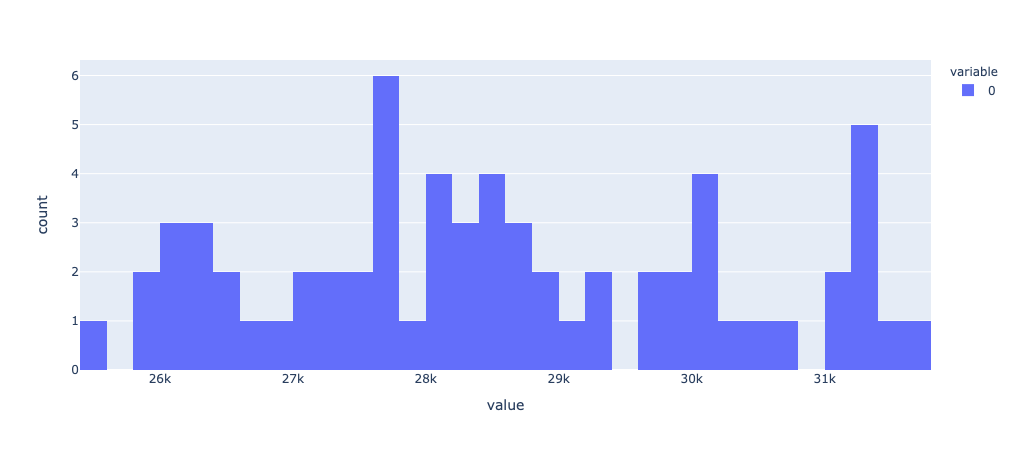

In [14]:
px.histogram([len(x) for x in sequences], nbins=50)

# SARS COV 2 with proteins markup analysis

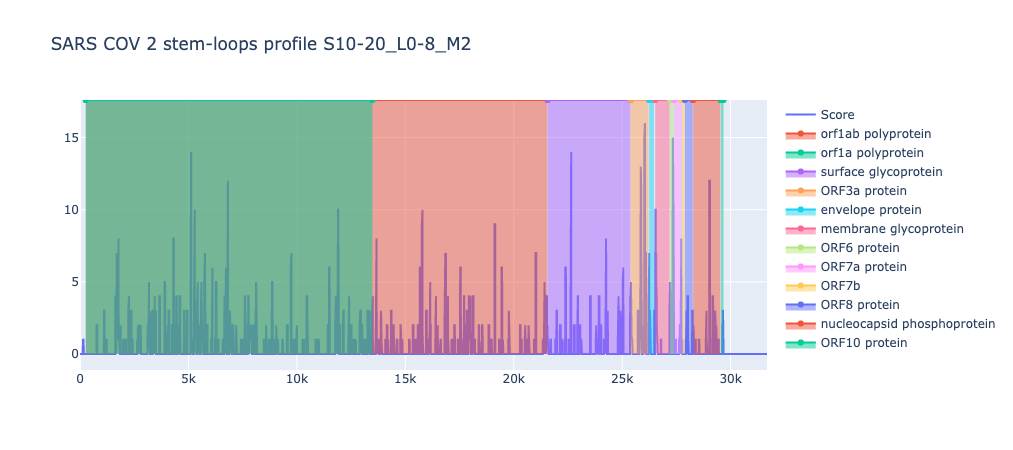

In [39]:
bins_scores_df = pd.read_csv(f'results/sars_cov_2_pal_S10-20_L0-8_M2_sars_cov_2_scores_by_virus_10.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
MIN_Y_VALUE = -1 * 1.1
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
proteins_df = pd.read_csv('proteins_86693_757732.csv', header=0)
y = 1
for _, row in proteins_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row.Start, row.Stop],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name=row['Protein Name'],
            fill='tozeroy',
            opacity=0.1
        )
    )
fig.update_layout(
    title='SARS COV 2 stem-loops profile S10-20_L0-8_M2',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

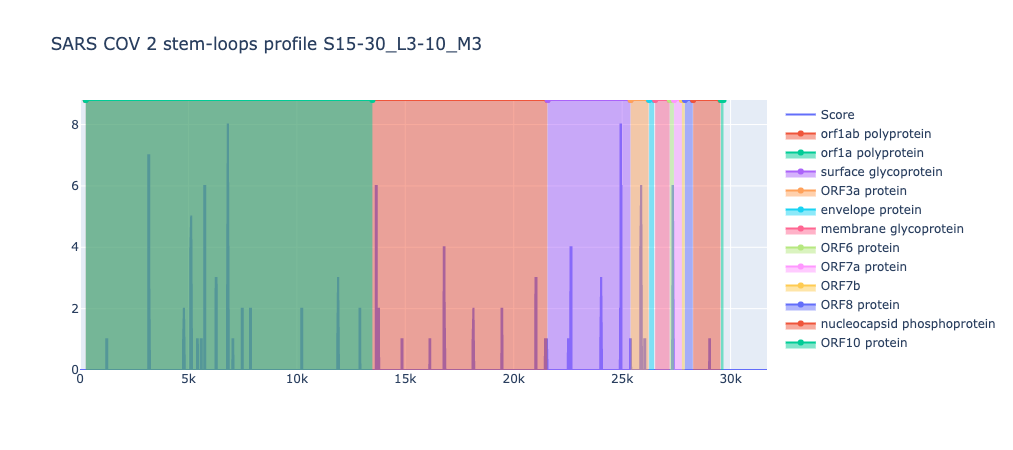

In [40]:
bins_scores_df = pd.read_csv(f'sars_cov_2_pal_S15-30_L3-10_M3_sars_cov_2_scores_by_virus_10.csv')
# bins_scores_pvals_df['NegLog10Pval'] = -1 * np.log10(bins_scores_pvals_df.P_val)
# bins_scores_pvals_df['NegLog10AdjPval'] = -1 * np.log10(bins_scores_pvals_df.P_val_adjusted)
# LOG_DEFAULT_THRESHOLD = -1 * np.log10(PVAL_THRESHOLD)
bins_scores_df_by_bins = bins_scores_df.groupby('Start').agg({'Score': np.mean}).reset_index()
bins_scores_df_by_bins['Std'] = bins_scores_df.groupby('Start').agg({'Score': np.std}).reset_index(drop=True)
bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
MIN_Y_VALUE = 0
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=bins_scores_df_by_bins['Start'],
        y=bins_scores_df_by_bins['Score'],
        name='Score',
    )
)
y = 1
for _, row in proteins_df.iterrows():
    fig.add_trace(
        go.Scatter(
            x=[row.Start, row.Stop],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name=row['Protein Name'],
            fill='tozeroy',
            opacity=0.1
        )
    )
fig.update_layout(
    title='SARS COV 2 stem-loops profile S15-30_L3-10_M3',
)
fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
fig.show()

# Parse fasta annotations

In [11]:
import re

In [28]:
features = list(SeqIO.parse('raw_fasta/gene_features_all_coronaviruses_ncbi.fasta', 'fasta'))

In [29]:
annotations = [row.description for row in features]

In [37]:
annotation_results = []
for row in annotations:
    seq_name = re.findall(r'NC_[0-9]*\.[0-9]', row)[0]
    parsed = {
        match.split('=')[0]: match.split('=')[1]
        for match in re.findall(r'[^\[]*=[^\]]*', row)
    }
    parsed['name'] = seq_name
    parsed['Start'], parsed['End'] = parsed['location'].split('..') 
    annotation_results.append(parsed)
annotation_df = pd.DataFrame.from_dict(annotation_results).set_index('name')
annotation_df.to_csv('results/all_coronaviruses_genes_annotation.csv')

# All coronaviruses with proteins markup plots

In [38]:
# bins_scores_df = pd.read_csv(f'results/coronaviruses_scores_by_virus_10_S10-20_L0-8_M2.csv', index_col=0)
# annotation_df = pd.read_csv('results/all_coronaviruses_genes_annotation.csv')
# annotation_df.gene.fillna('', inplace=True)
# for virus, virus_df in bins_scores_df.groupby('virus'):
#     id_ = virus_df.id.unique()[0]
#     bins_scores_df_by_bins = virus_df.groupby('Start').agg({'Score': np.mean}).reset_index()
#     bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
#     MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
#     MIN_Y_VALUE = 0
#     fig = go.Figure()
#     fig.add_trace(
#         go.Scatter(
#             x=bins_scores_df_by_bins['Start'],
#             y=bins_scores_df_by_bins['Score'],
#             name='Score',
#         )
#     )
#     y = 1
#     for _, row in annotation_df[annotation_df.name==id_].iterrows():
#         fig.add_trace(
#             go.Scatter(
#                 x=[row.Start, row.End],
#                 y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
#                 name=row['gene'] if row['gene'] else row['locus_tag'],
#                 fill='tozeroy',
#                 opacity=0.1
#             )
#         )
#     fig.update_layout(
#         title=f'{virus.split(".fasta")[0]} stem-loops profile S10-20_L0-8_M2',
#     )
#     fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
#     fig.show()

In [2]:
# bins_scores_df = pd.read_csv(f'results/coronaviruses_scores_by_virus_10_S15-30_L3-10_M3.csv', index_col=0)
# annotation_df = pd.read_csv('results/all_coronaviruses_genes_annotation.csv')
# annotation_df.gene.fillna('', inplace=True)

# for virus, virus_df in bins_scores_df.groupby('virus'):
#     id_ = virus_df.id.unique()[0]
#     bins_scores_df_by_bins = virus_df.groupby('Start').agg({'Score': np.mean}).reset_index()
#     bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
#     MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
#     MIN_Y_VALUE = 0
#     fig = go.Figure()
#     fig.add_trace(
#         go.Scatter(
#             x=bins_scores_df_by_bins['Start'],
#             y=bins_scores_df_by_bins['Score'],
#             name='Score',
#         )
#     )
#     y = 1
#     for _, row in annotation_df[annotation_df.name==id_].iterrows():
#         fig.add_trace(
#             go.Scatter(
#                 x=[row.Start, row.End],
#                 y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
#                 name=row['gene'] if row['gene'] else row['locus_tag'],
#                 fill='tozeroy',
#                 opacity=0.1
#             )
#         )
#     fig.update_layout(
#         title=f'{virus.split(".fasta")[0]} stem-loops profile S15-30_L3-10_M3',
#     )
#     fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
#     fig.show()

# Surface glycoprotein stem-loops annotation S10-20_L0-8_M2

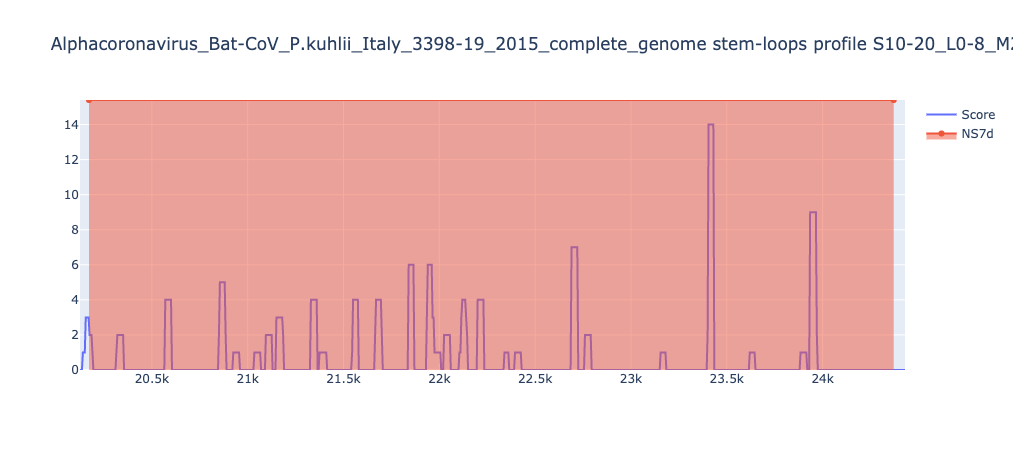

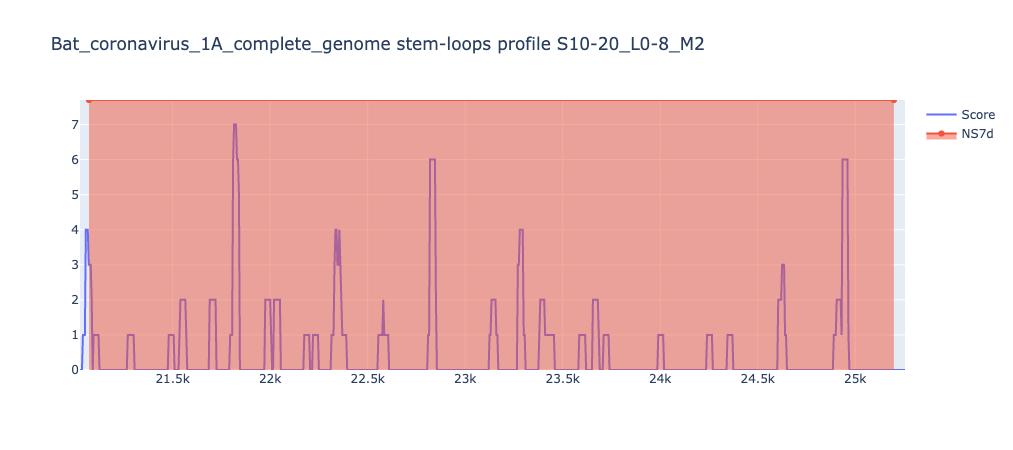

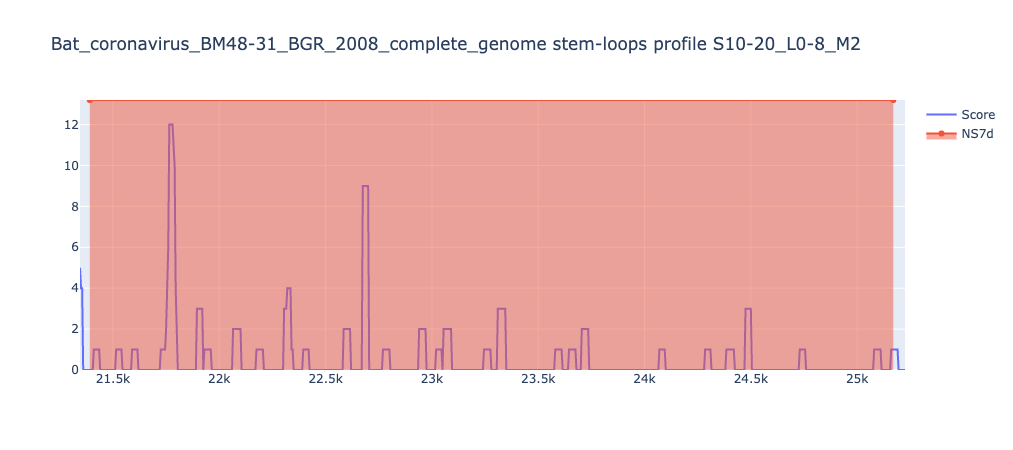

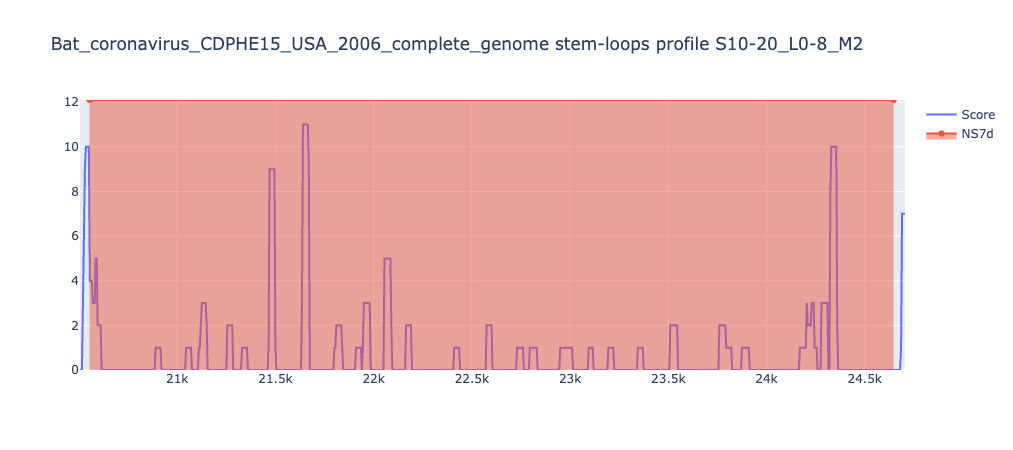

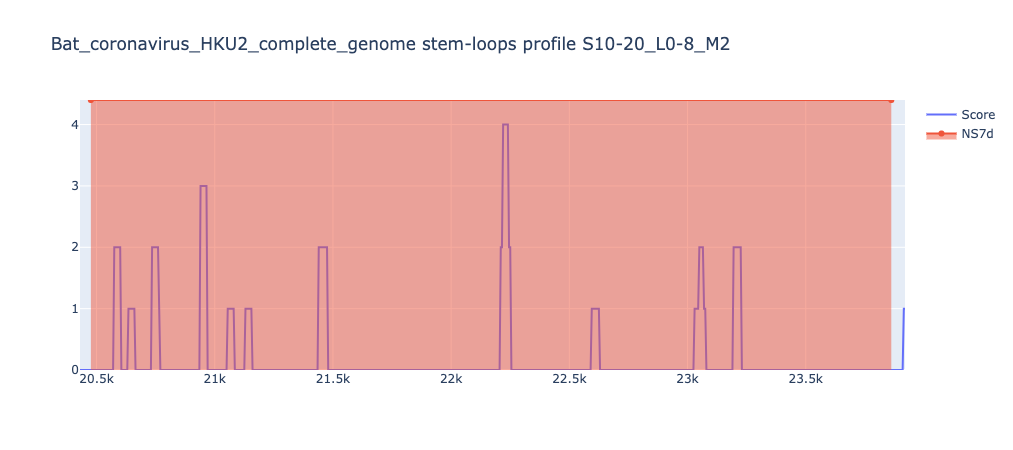

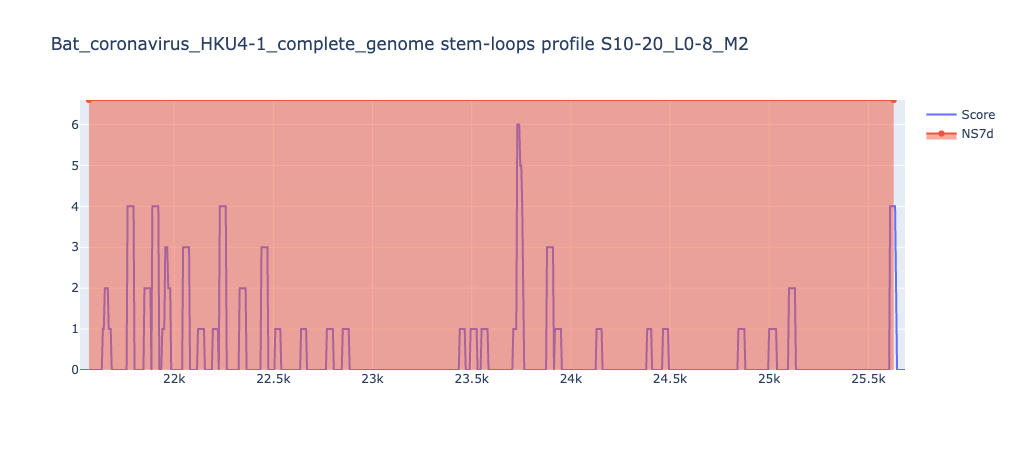

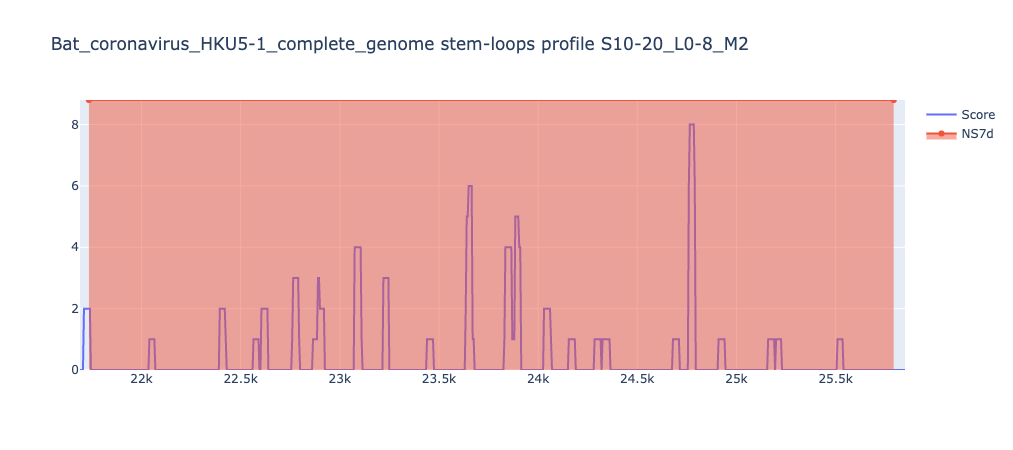

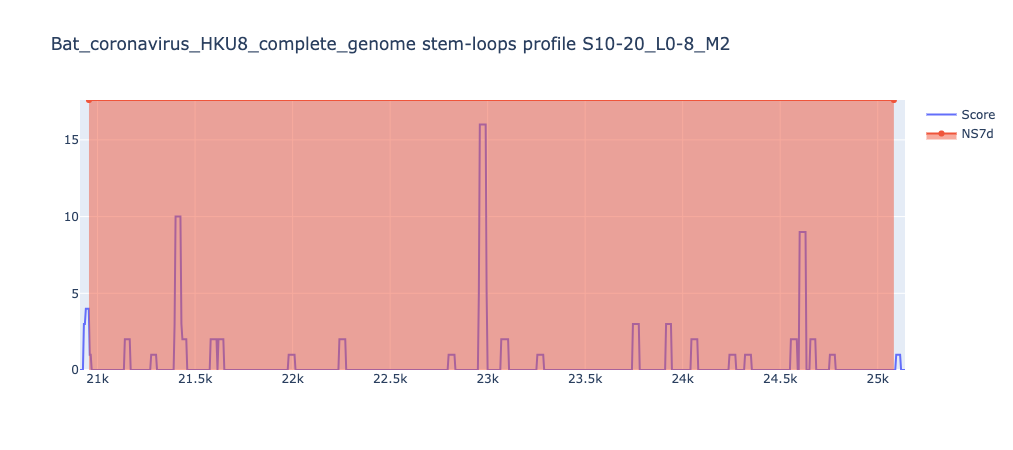

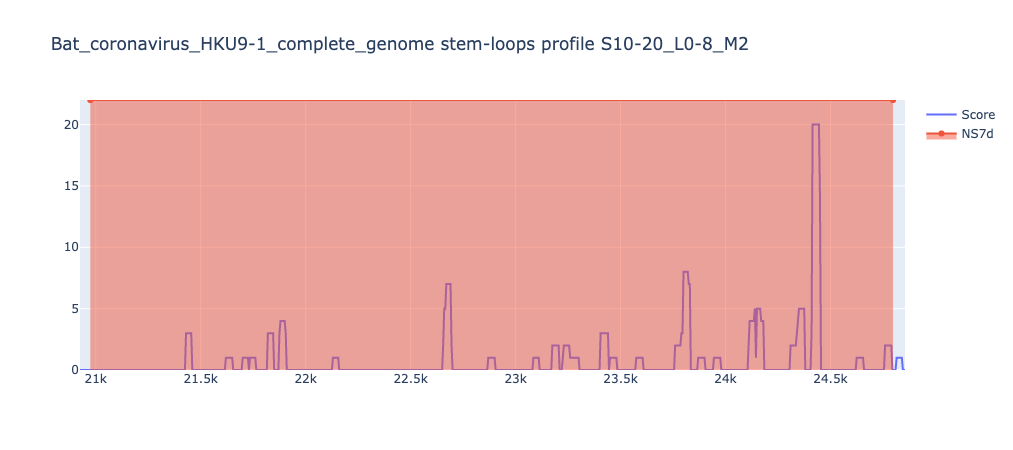

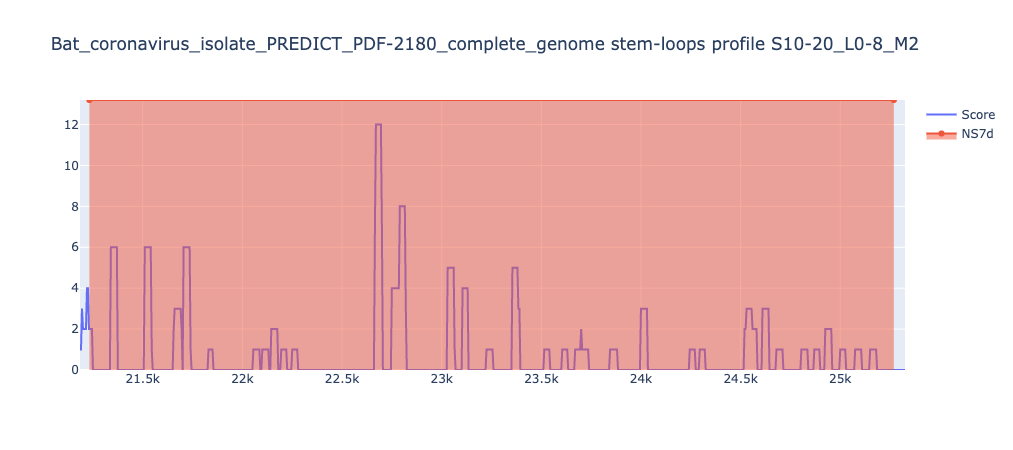

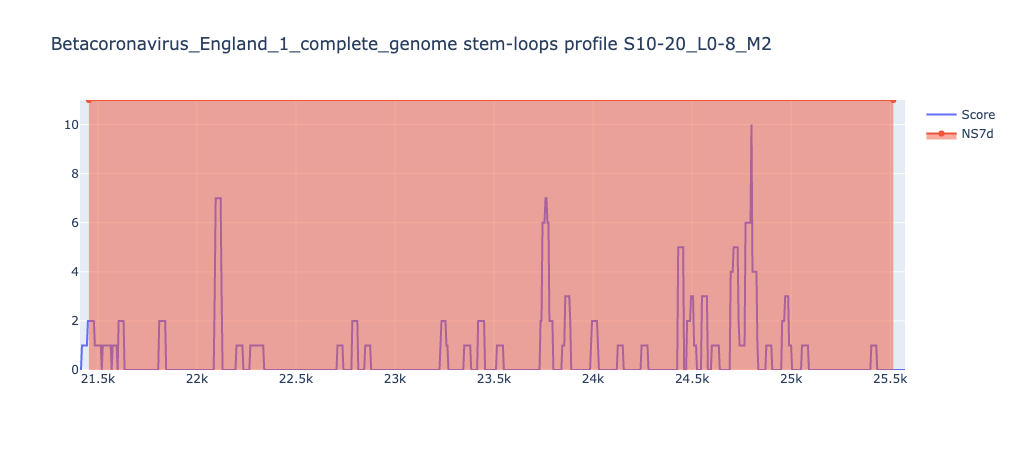

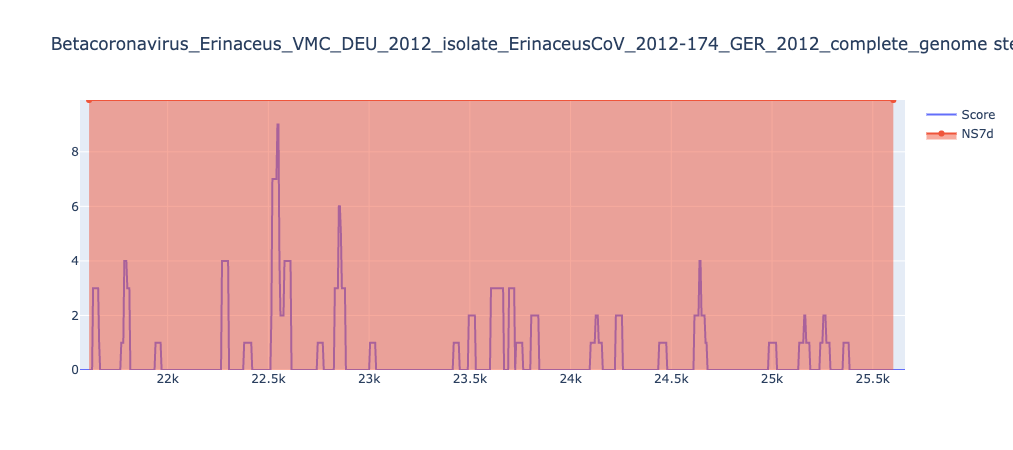

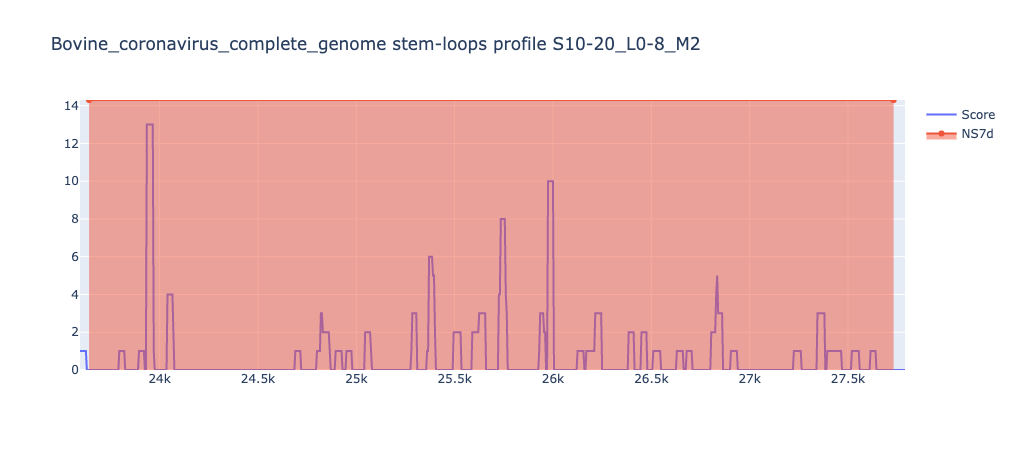

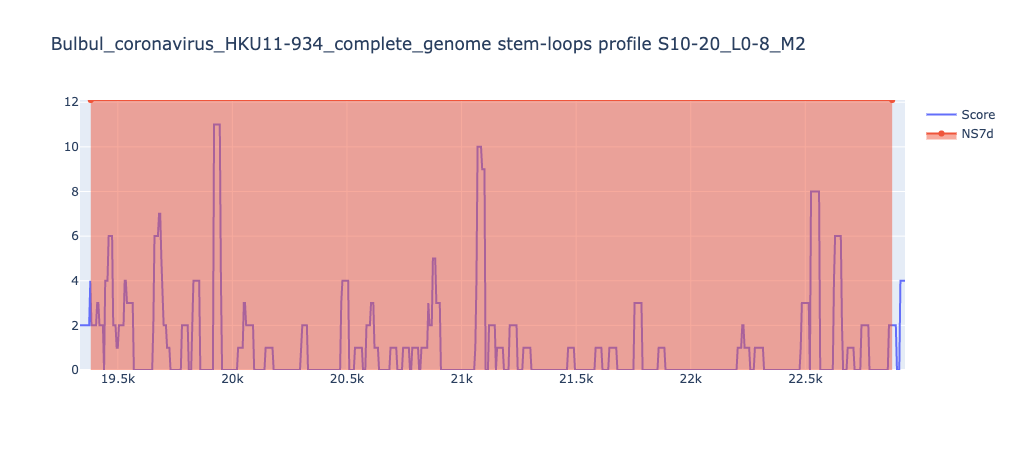

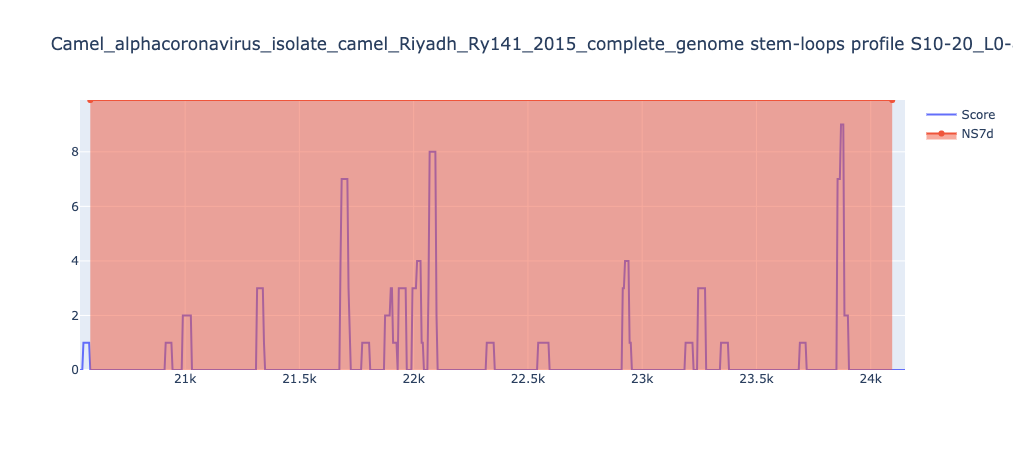

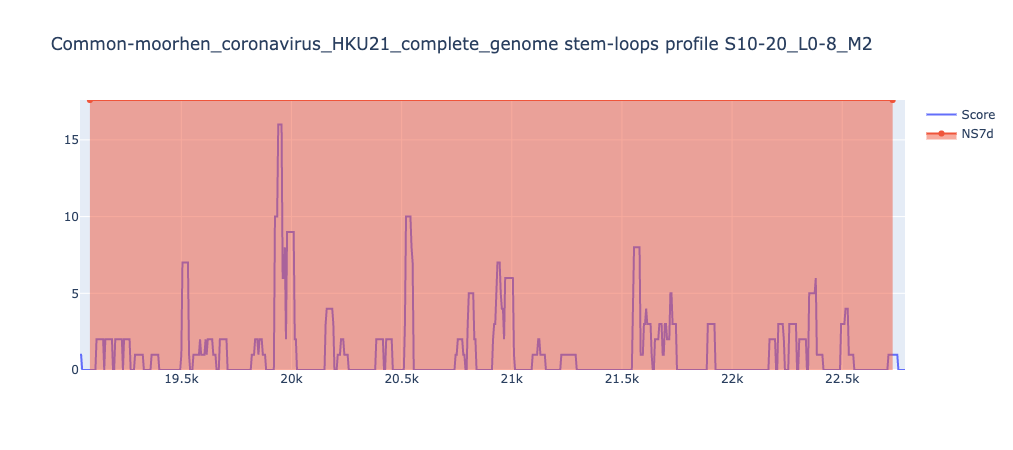

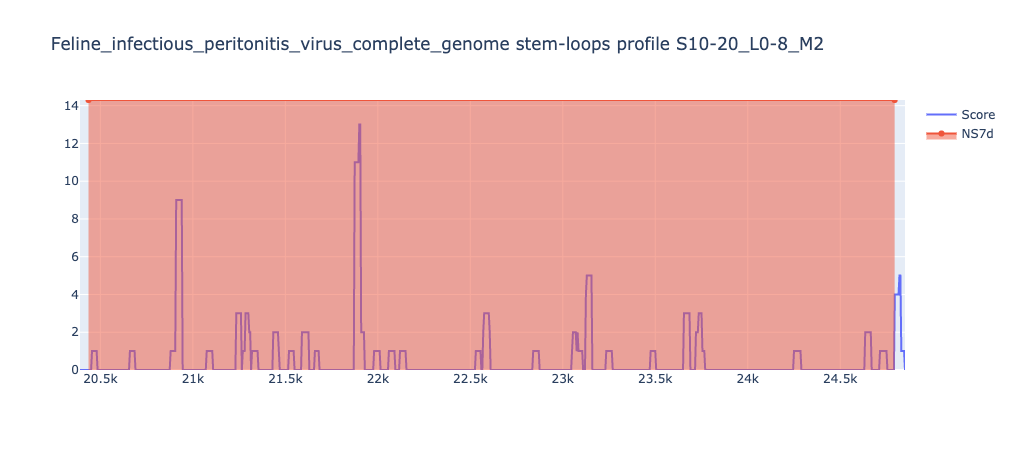

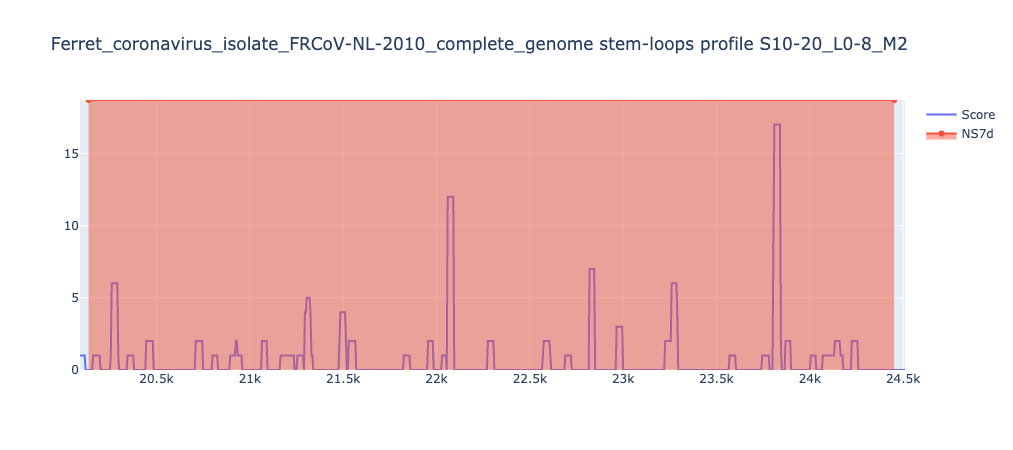

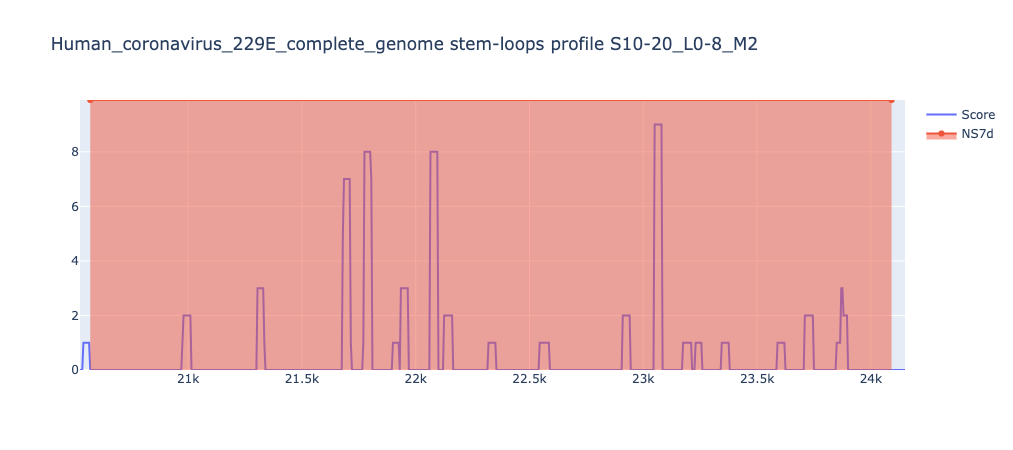

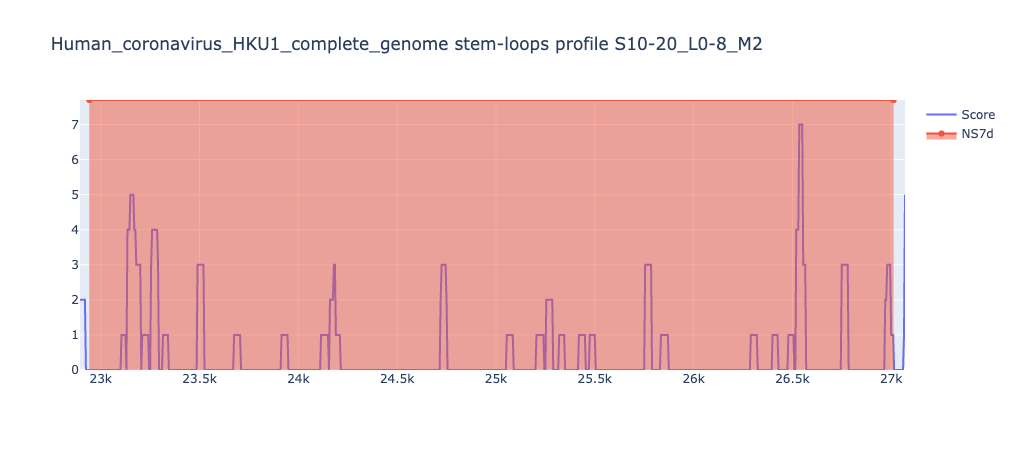

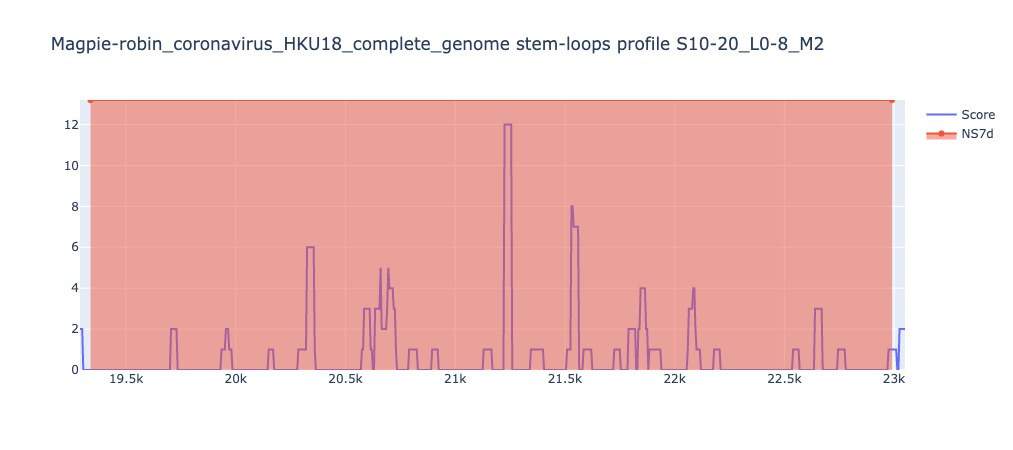

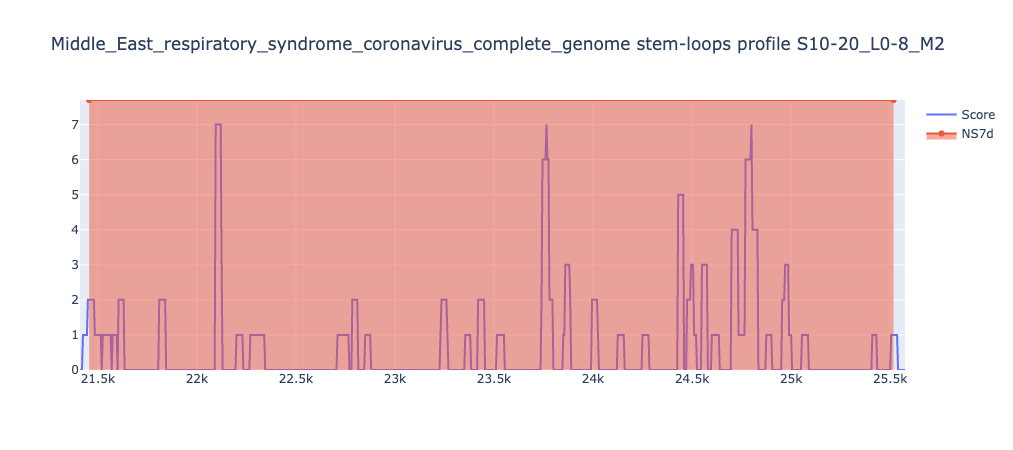

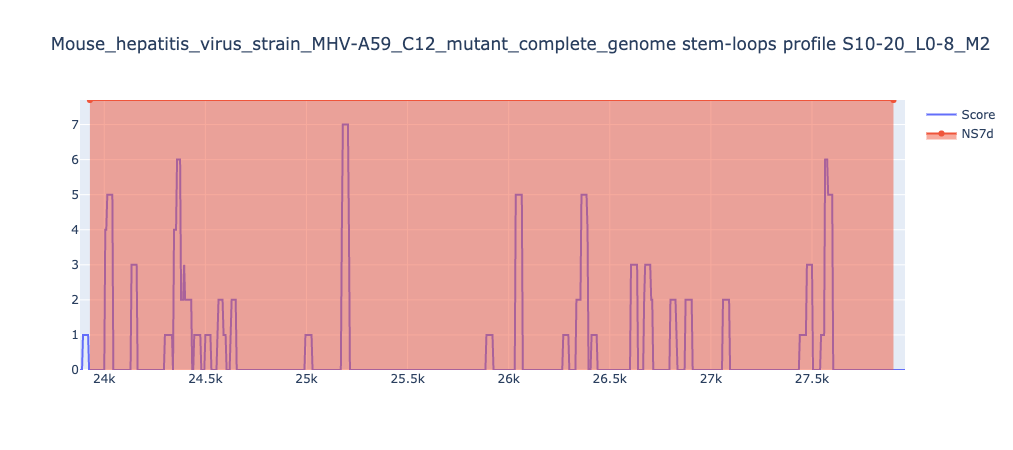

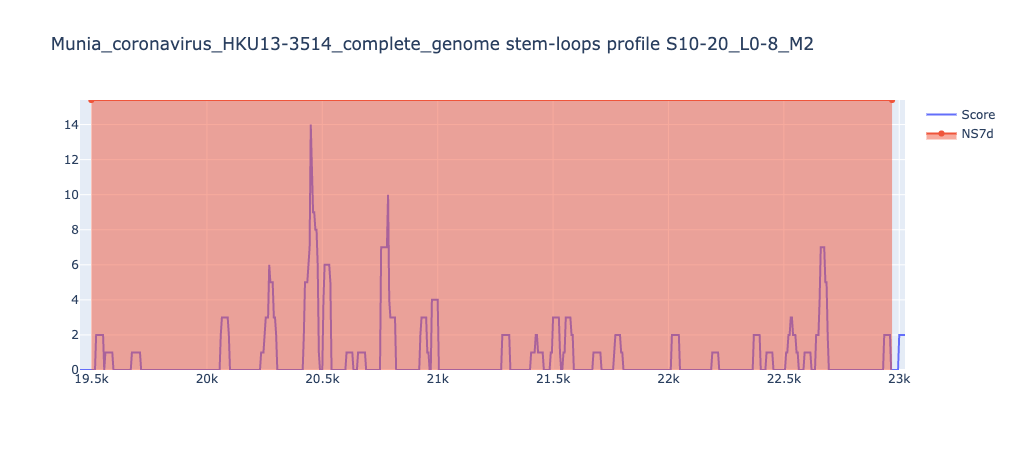

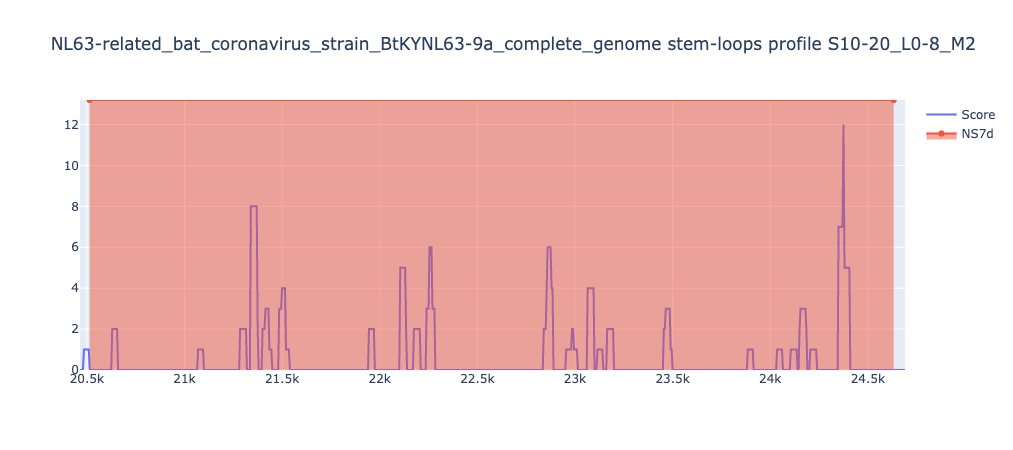

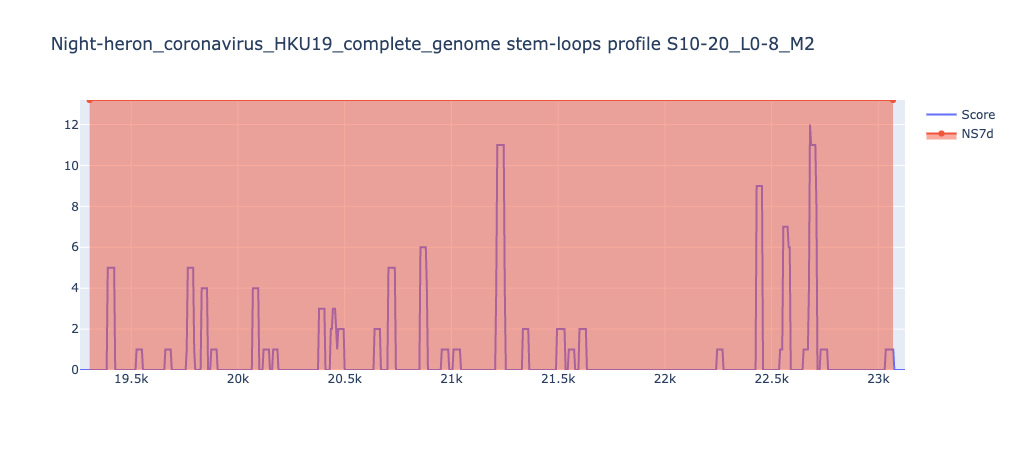

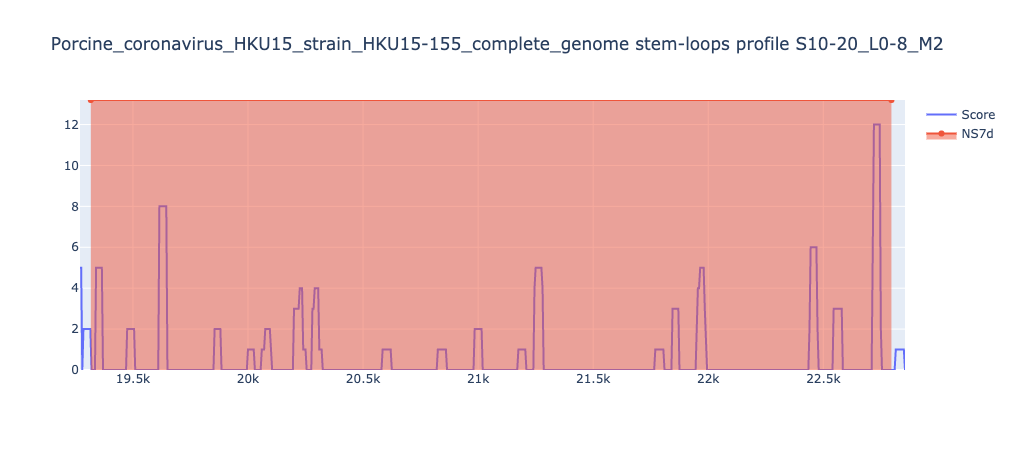

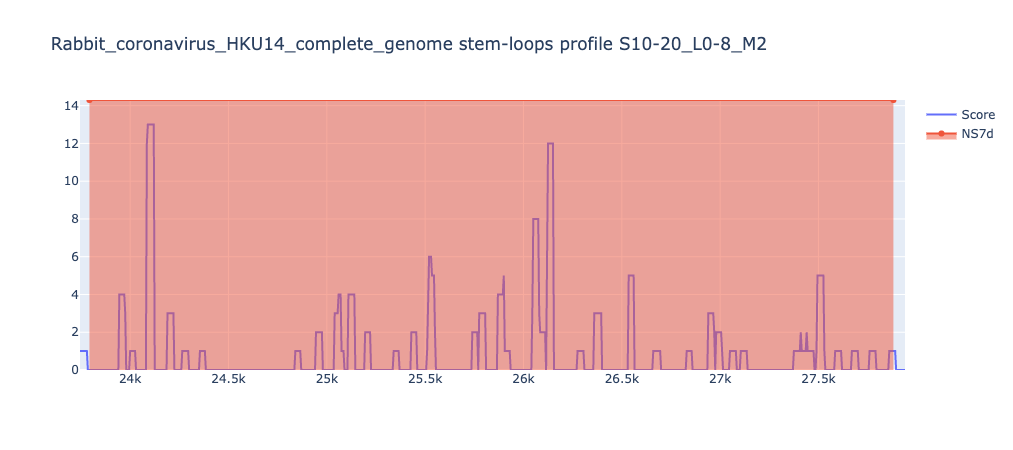

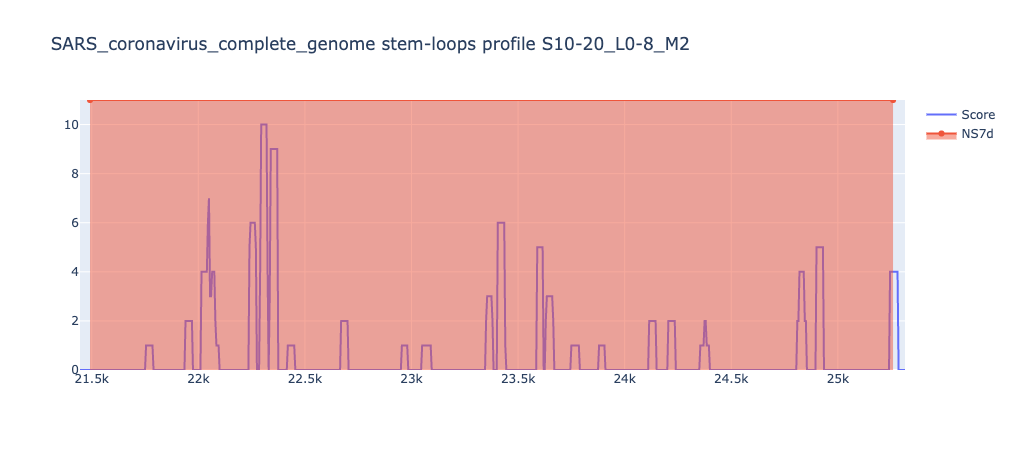

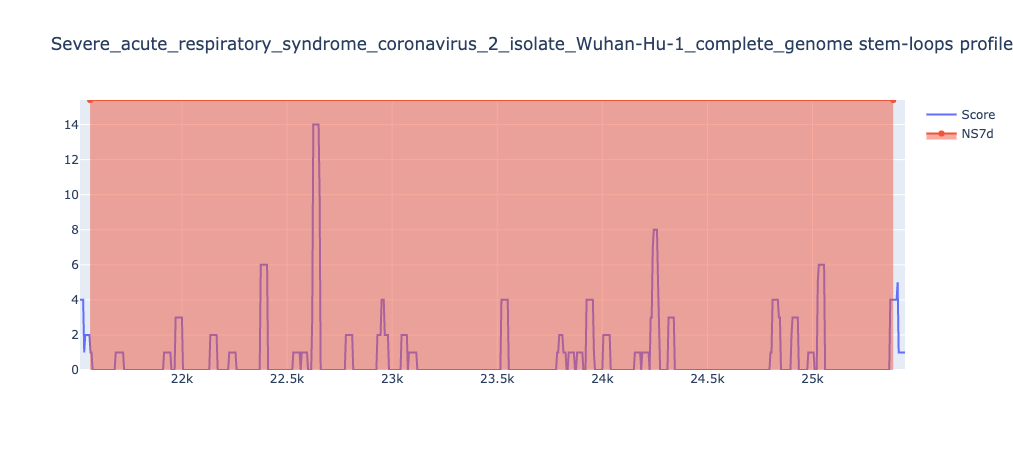

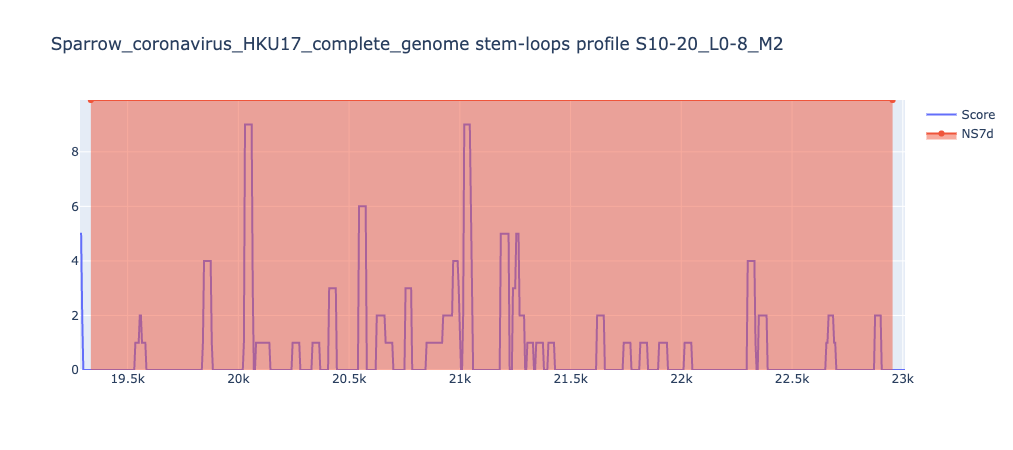

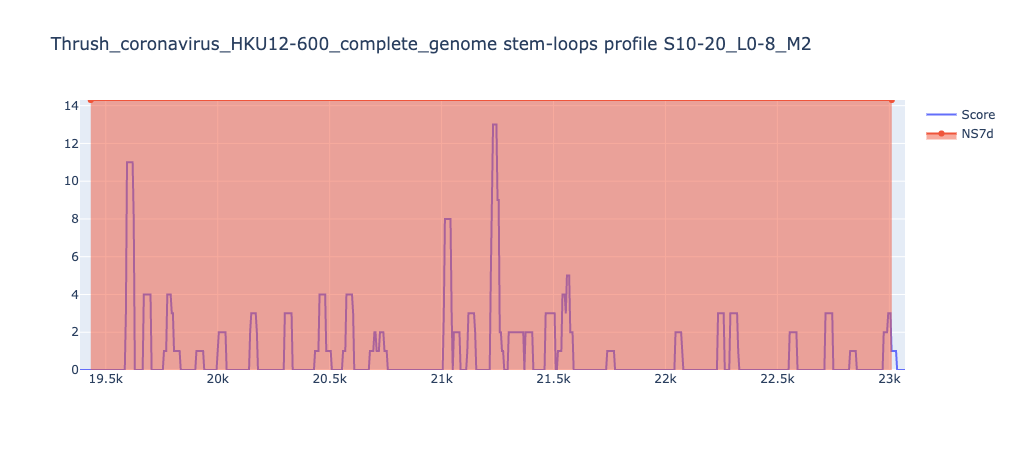

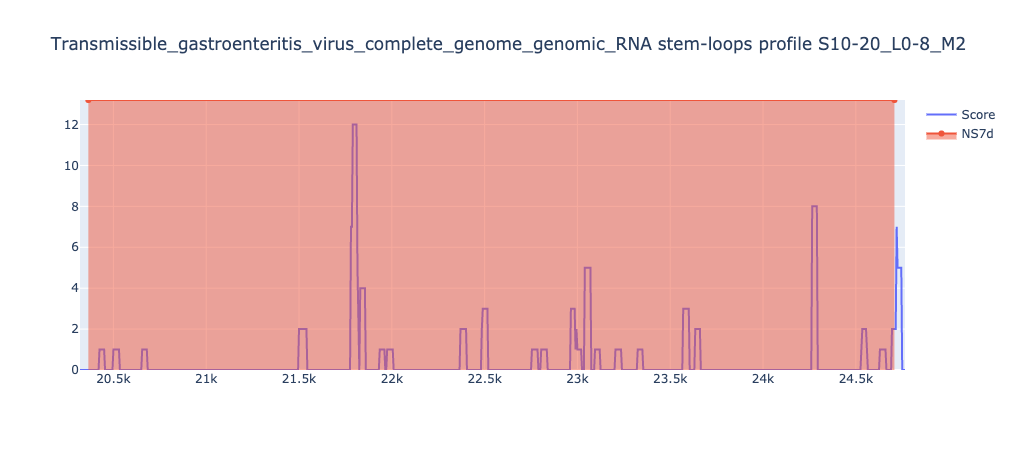

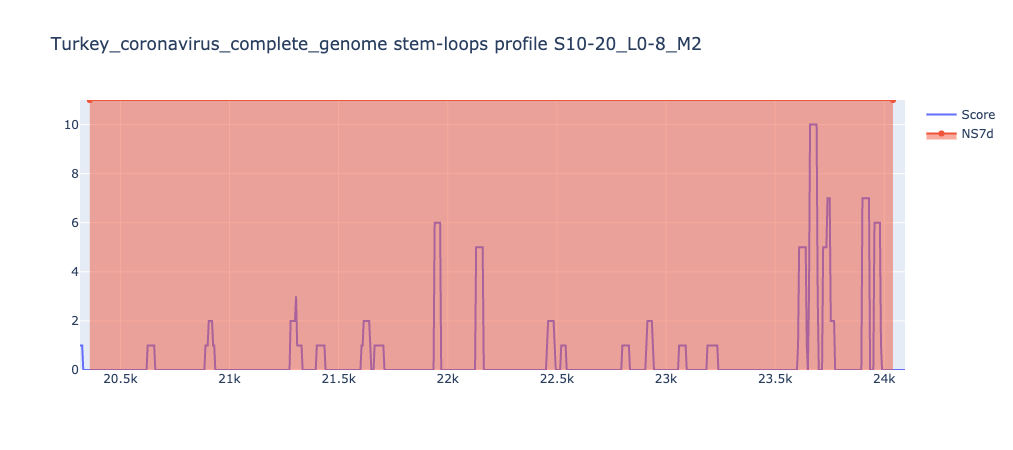

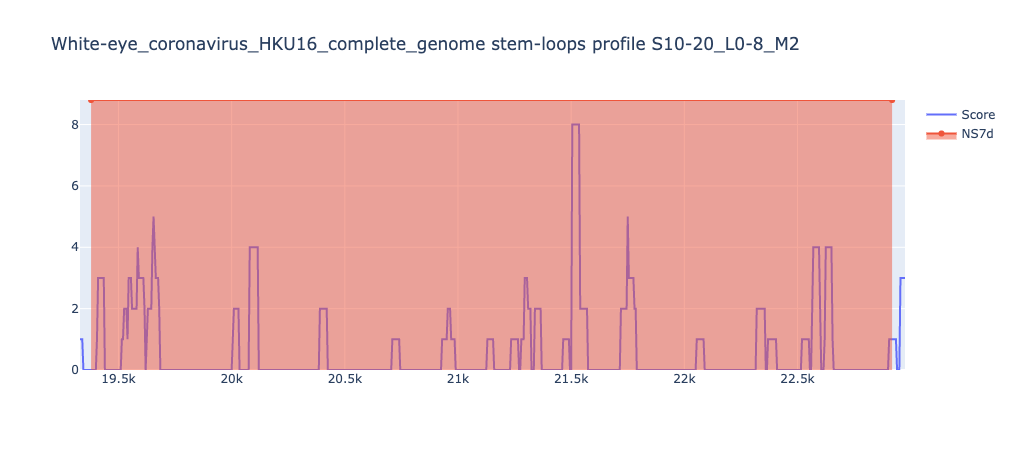

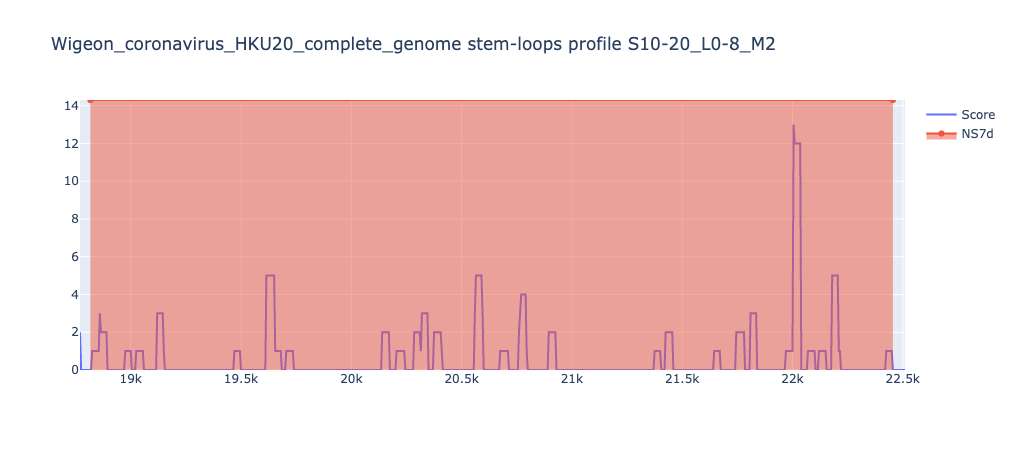

In [45]:
bins_scores_df = pd.read_csv(f'results/coronaviruses_scores_by_virus_10_S10-20_L0-8_M2.csv', index_col=0)
annotation_df = pd.read_csv('results/all_coronaviruses_genes_annotation.csv')
annotation_df = annotation_df[annotation_df.gene.notna()]
annotation_df = annotation_df[annotation_df.gene.str.lower() == 's'].set_index('name')
annotation_df.gene.fillna('', inplace=True)
for virus, virus_df in bins_scores_df.groupby('virus'):
    id_ = virus_df.id.unique()[0]
    if id_ not in annotation_df.index:
        continue
    gene_record = annotation_df.loc[id_]
    virus_df = virus_df[
    (virus_df.Start > gene_record.Start-50) &
    (virus_df.Start < gene_record.End+60)
    ]
    bins_scores_df_by_bins = virus_df.groupby('Start').agg({'Score': np.mean}).reset_index()
    bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
    MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
    MIN_Y_VALUE = 0
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=bins_scores_df_by_bins['Start'],
            y=bins_scores_df_by_bins['Score'],
            name='Score',
        )
    )
    y = 1
    fig.add_trace(
        go.Scatter(
            x=[gene_record.Start, gene_record.End],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name='S',
            fill='tozeroy',
            opacity=0.1
        )
    )
    fig.update_layout(
        title=f'{virus.split(".fasta")[0]} stem-loops profile S10-20_L0-8_M2',
    )
    fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
    fig.show()

# Surface glycoprotein stem-loops annotation S15-30_L3-10_M3

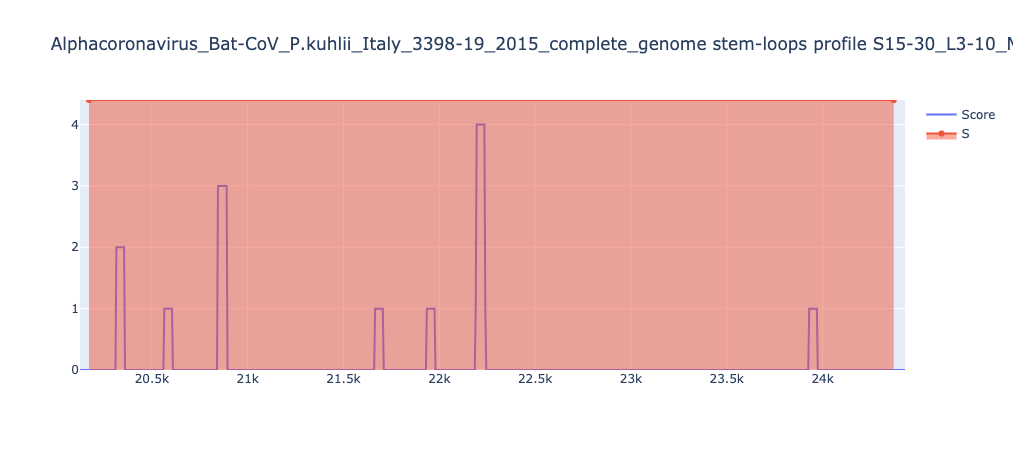

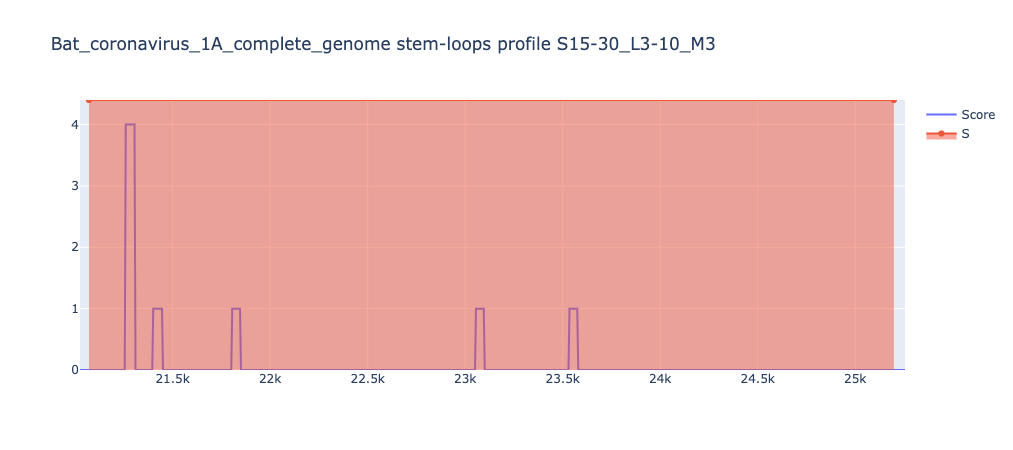

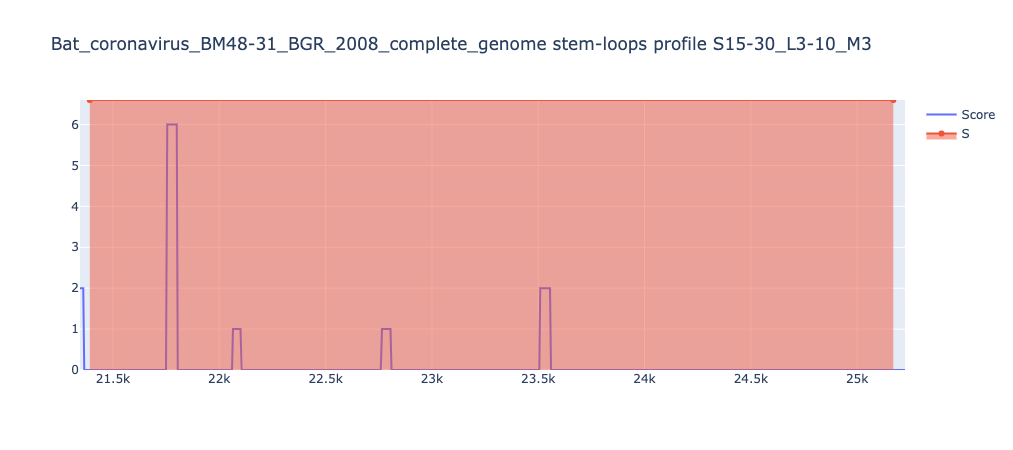

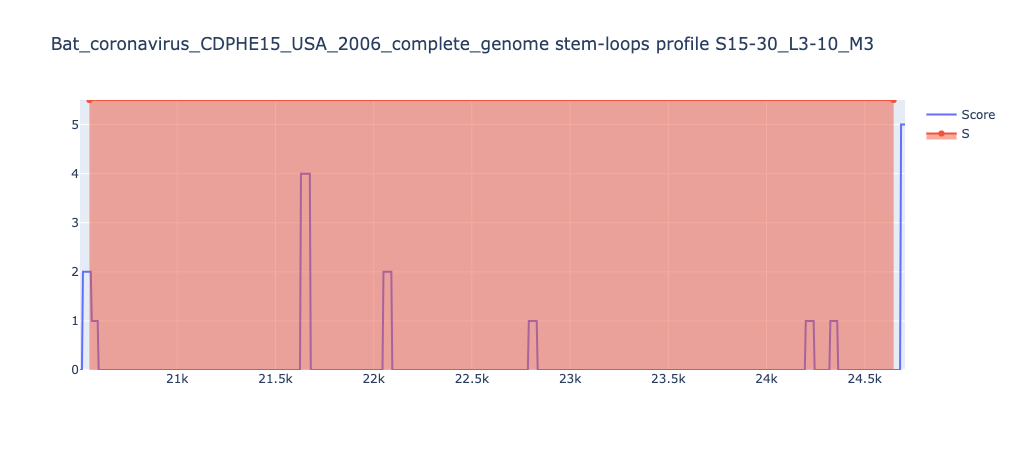

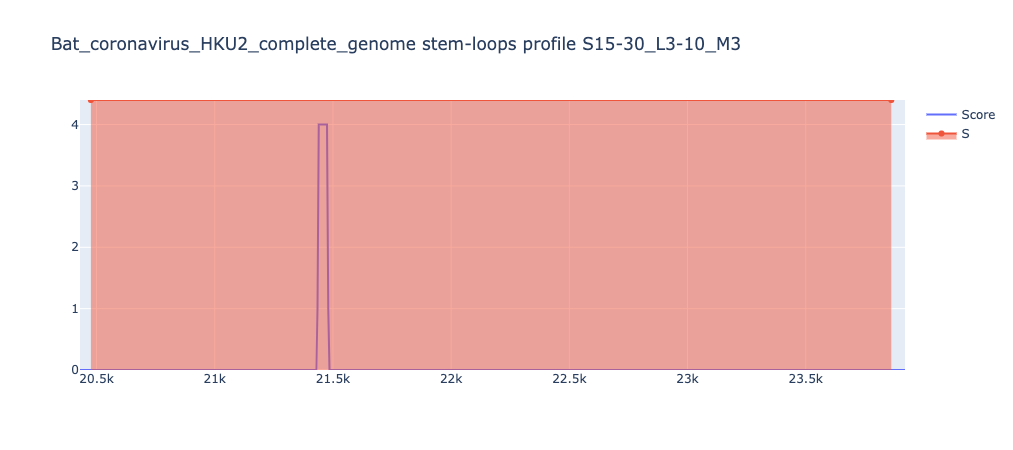

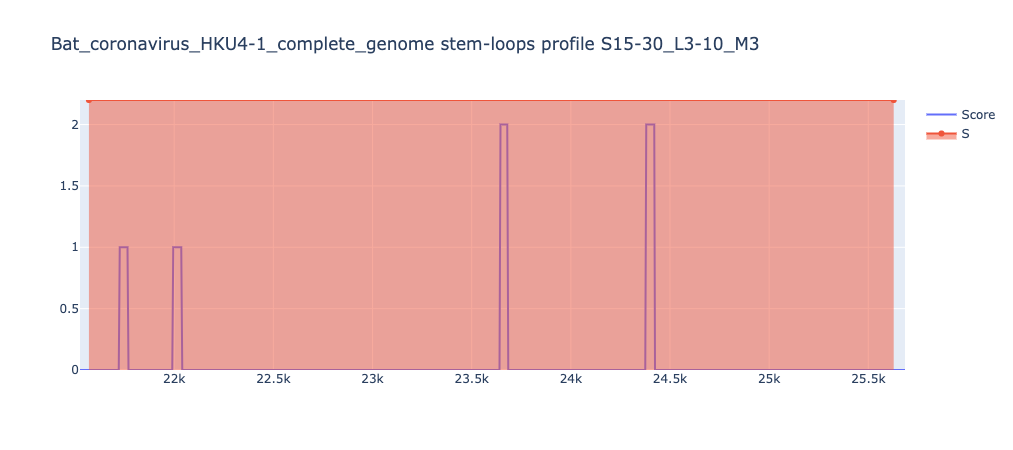

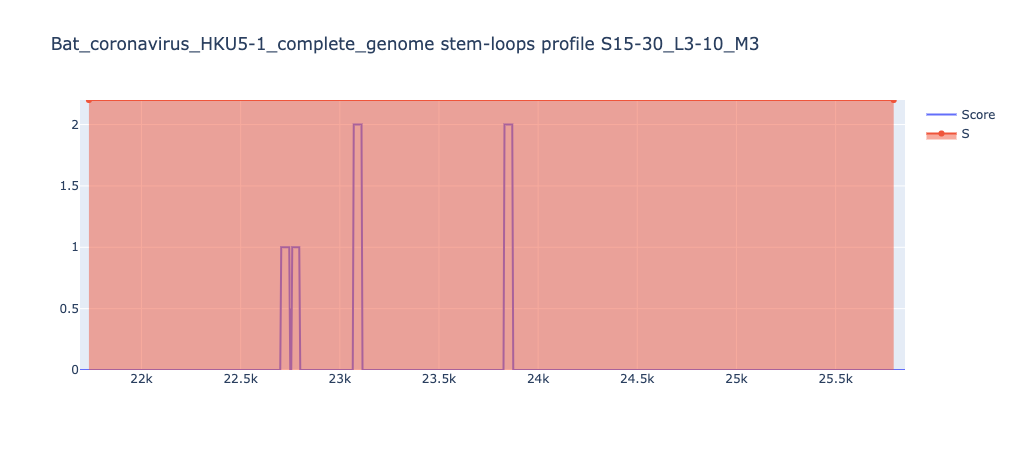

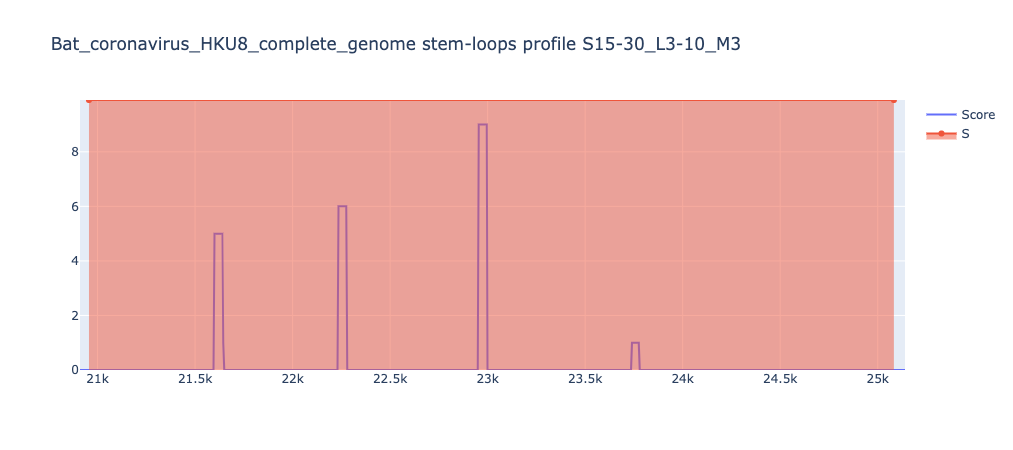

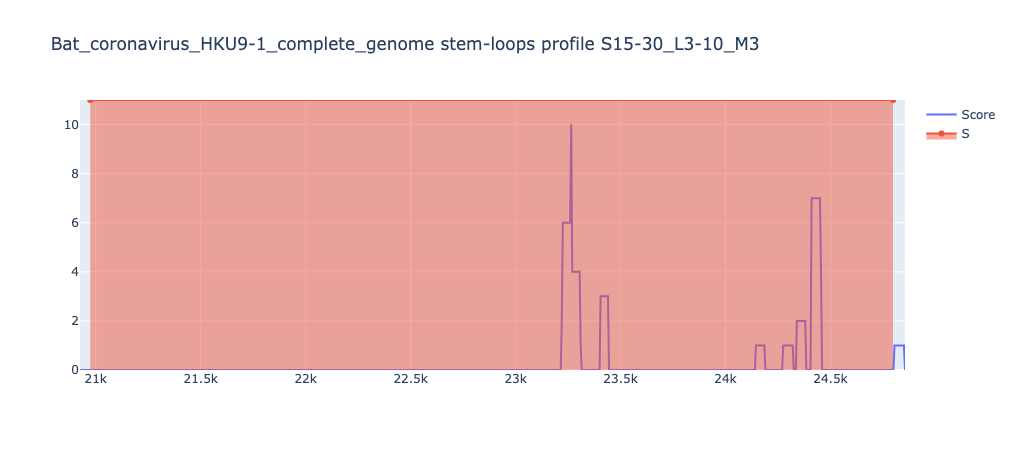

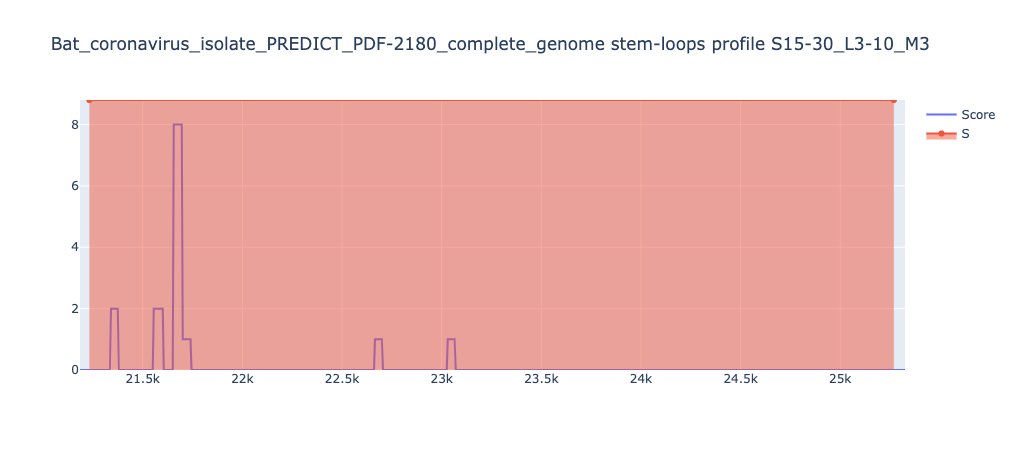

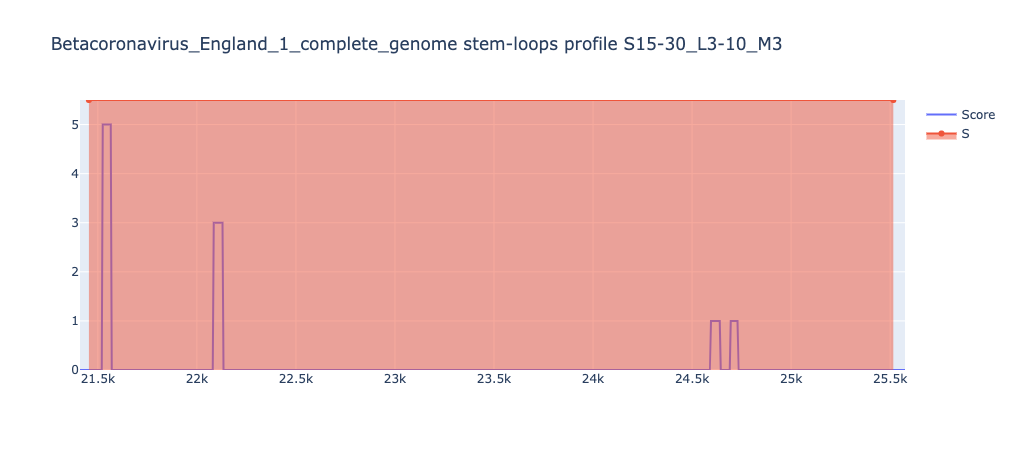

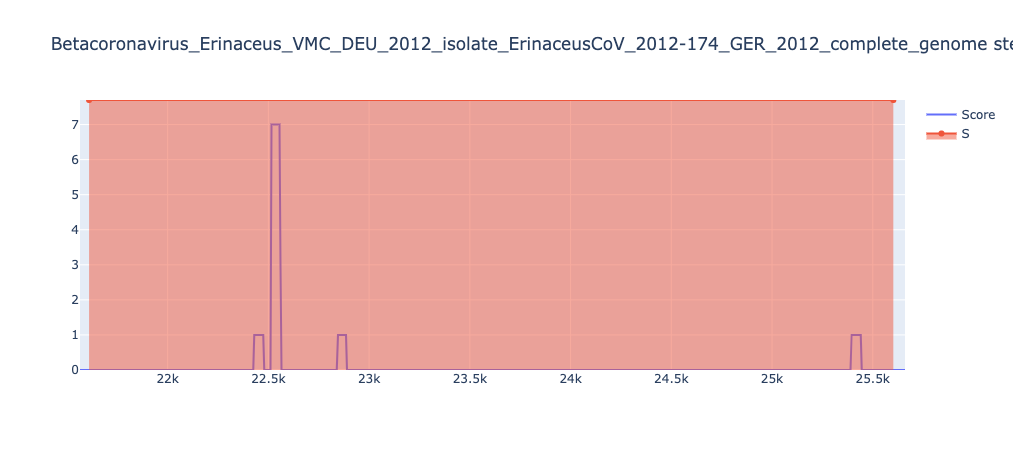

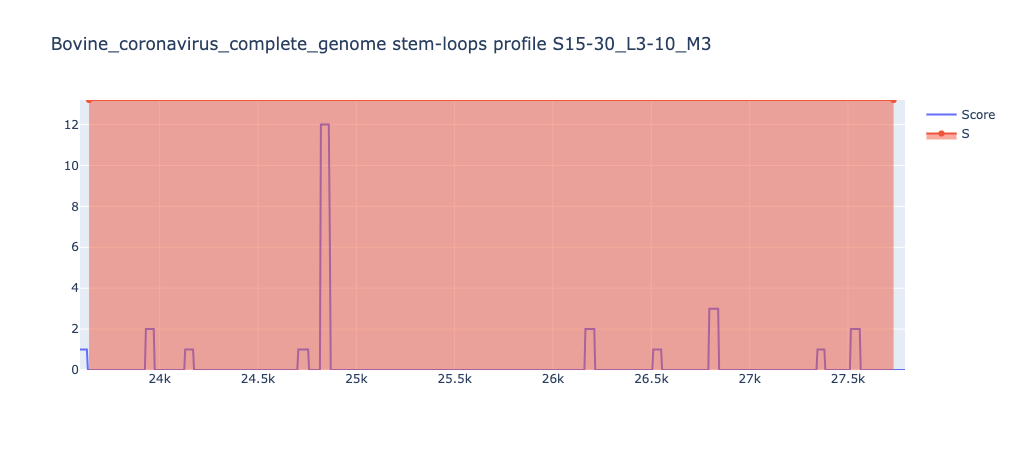

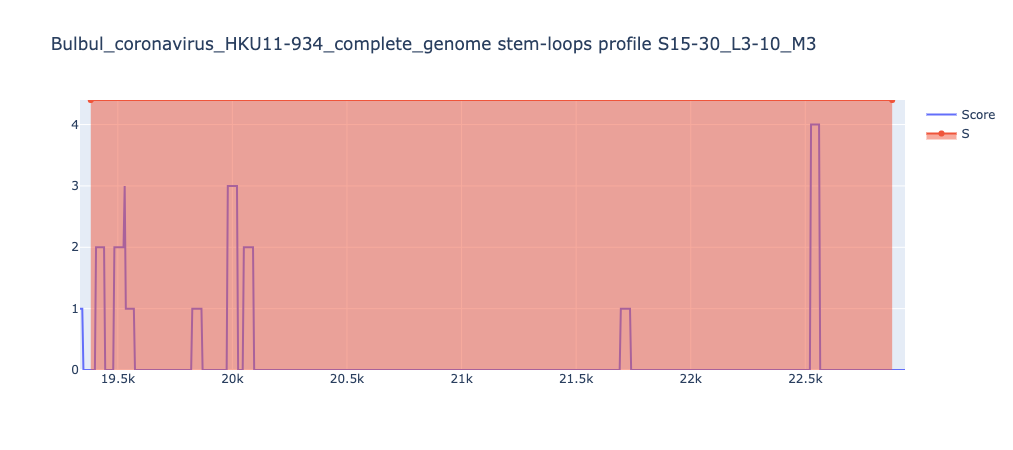

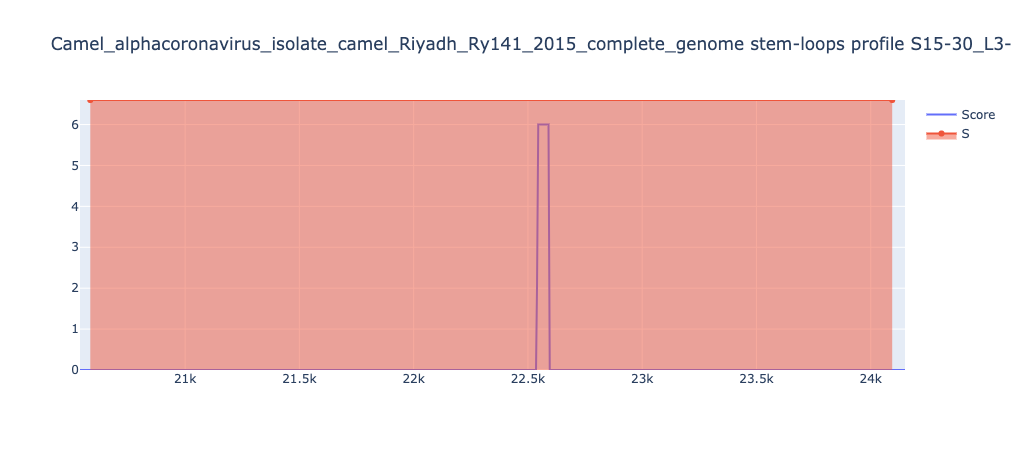

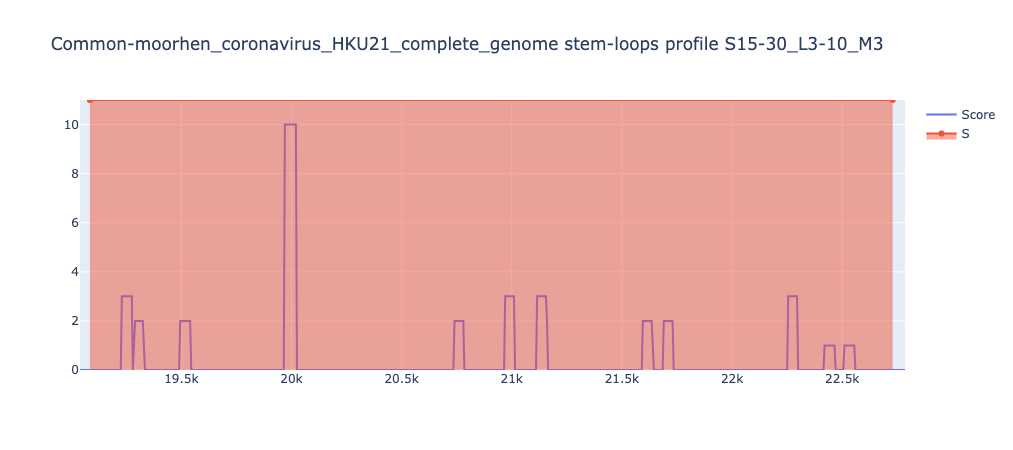

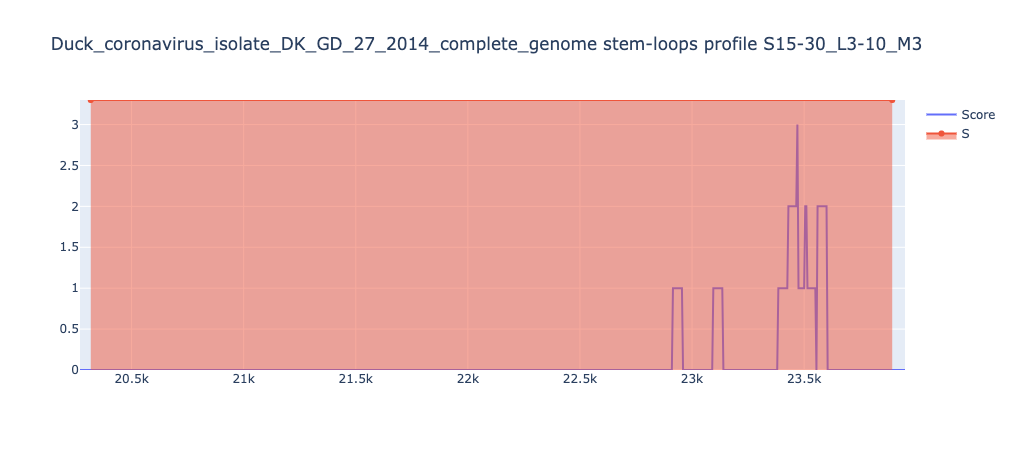

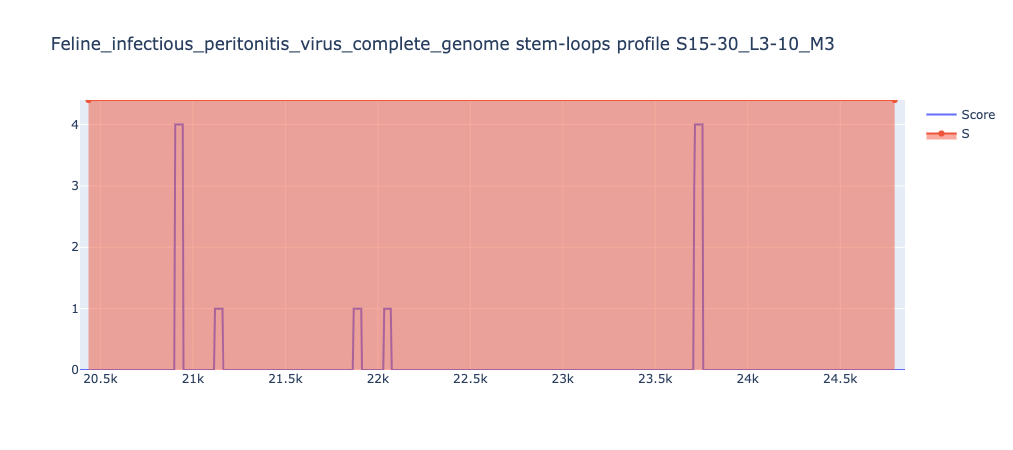

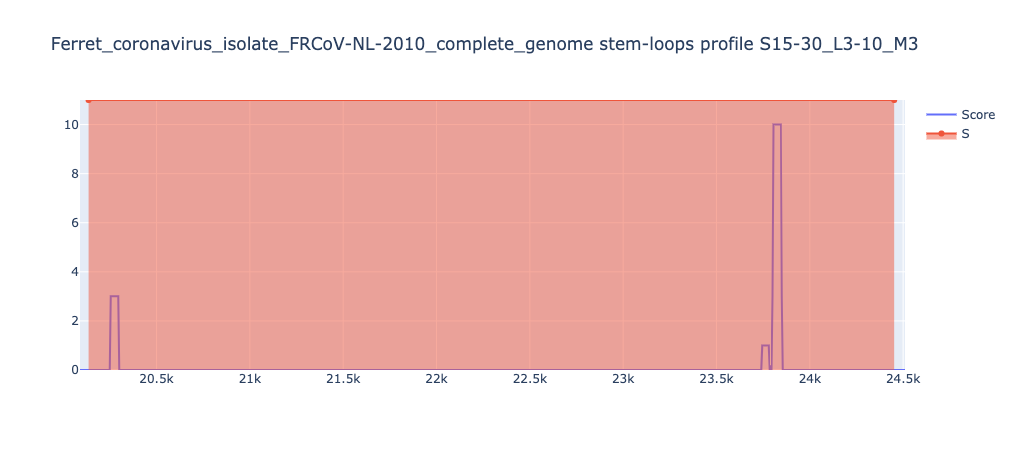

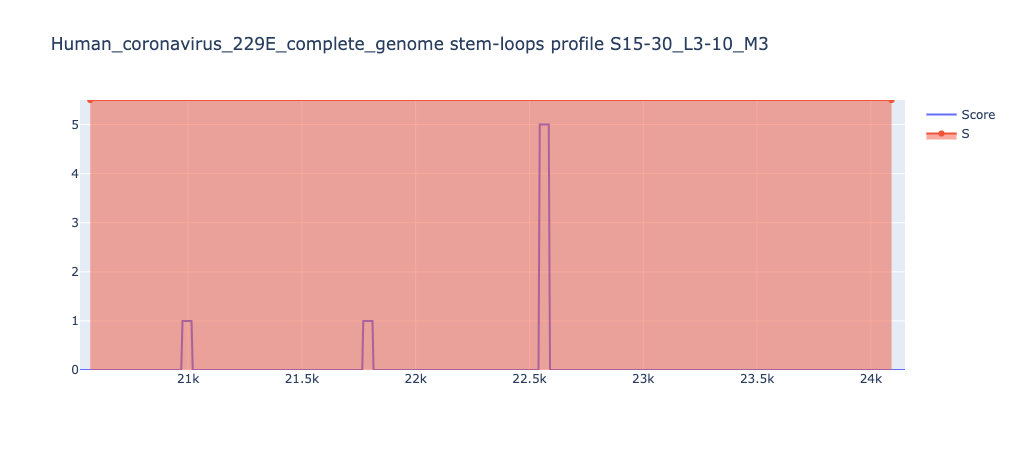

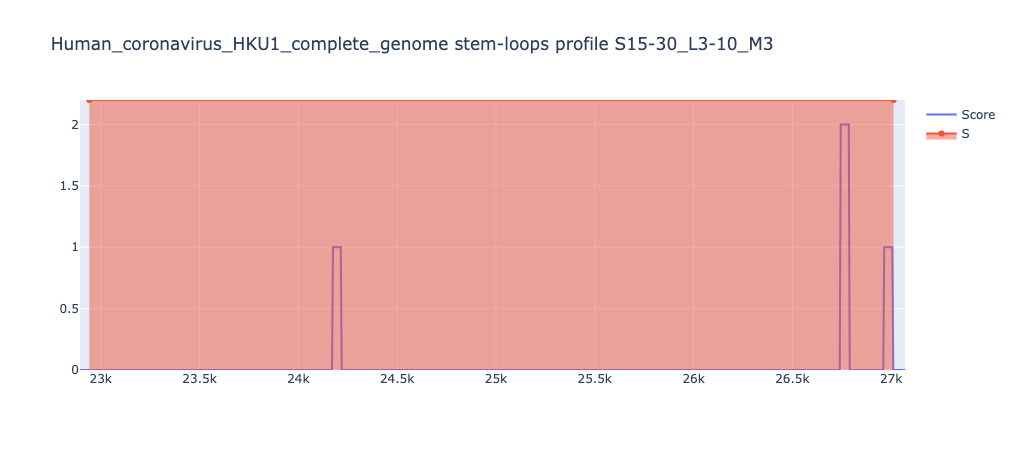

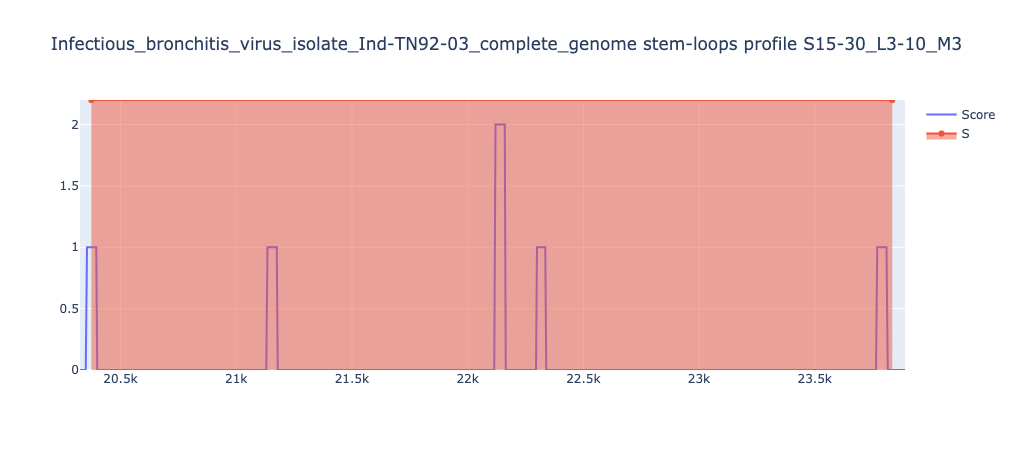

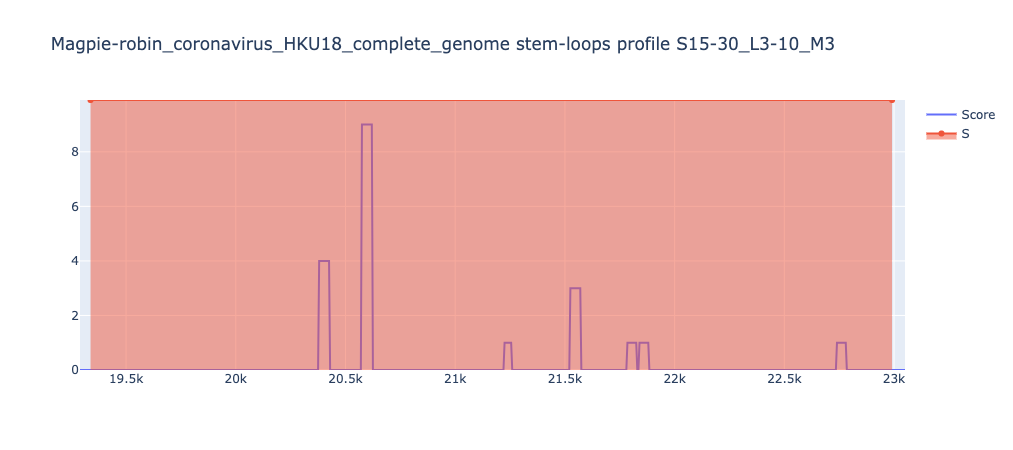

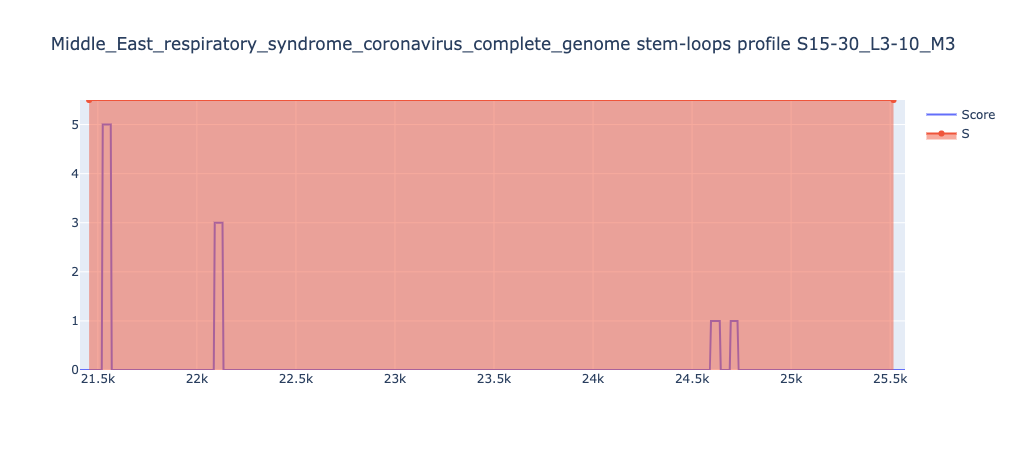

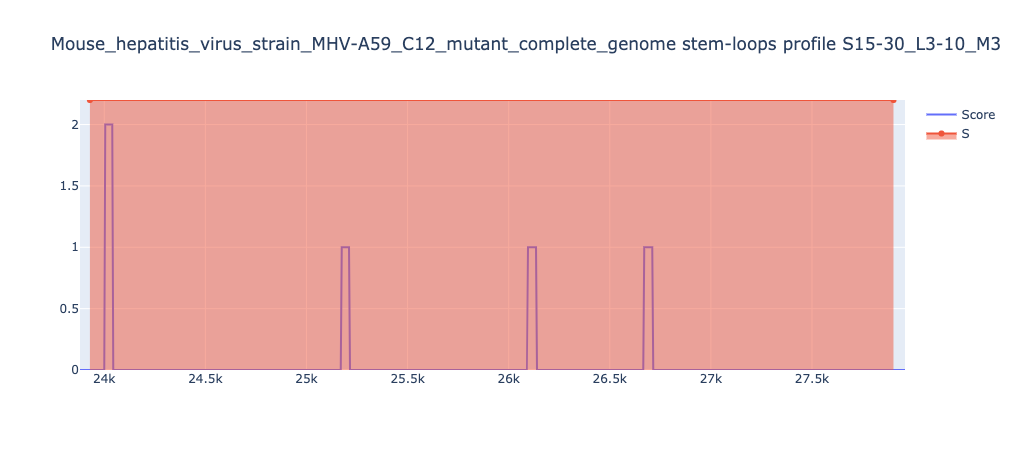

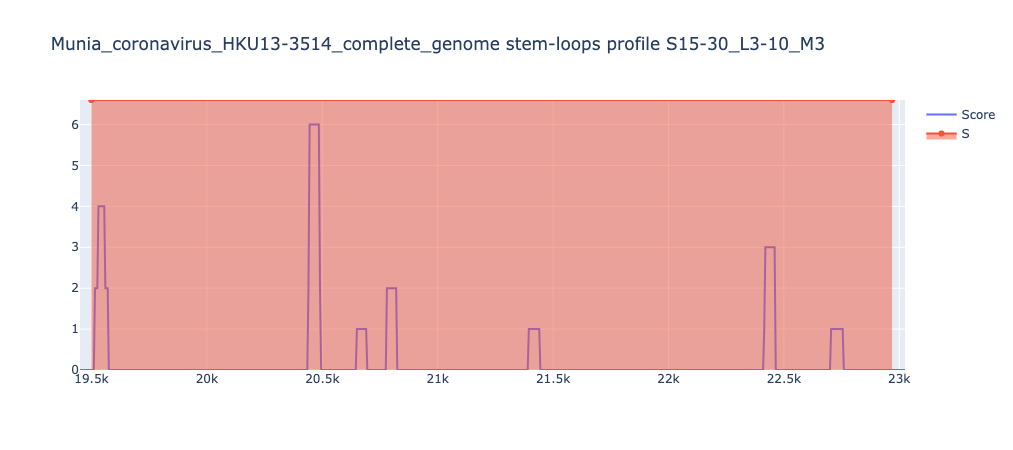

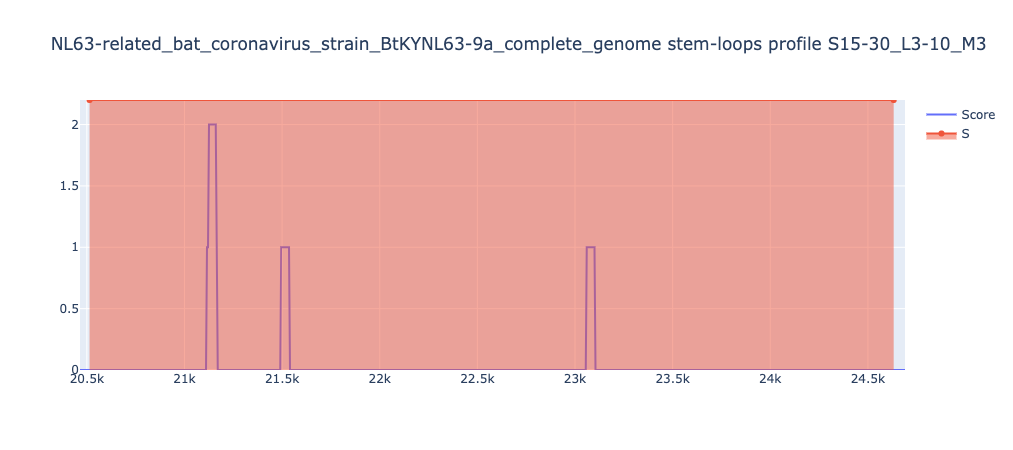

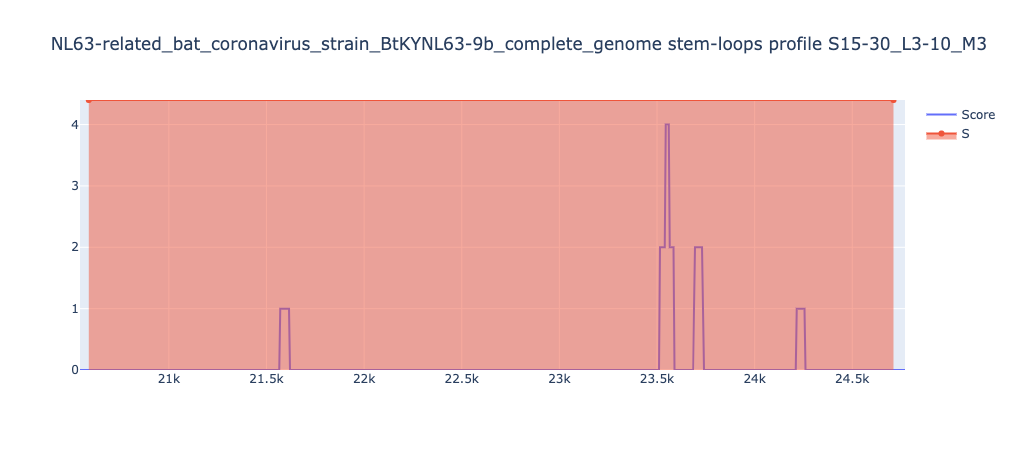

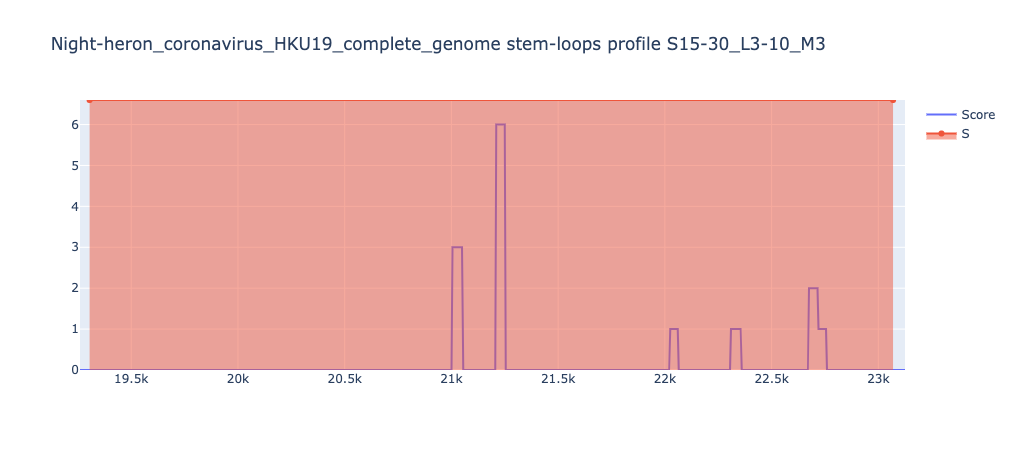

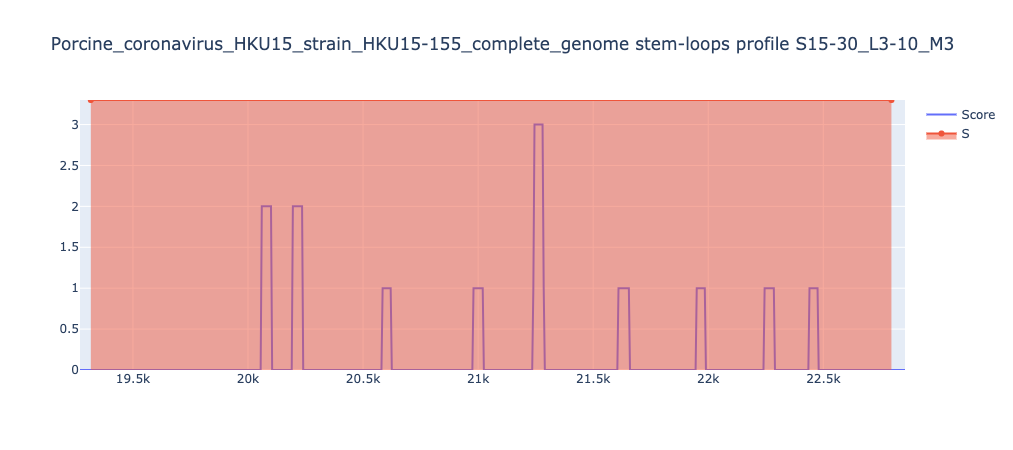

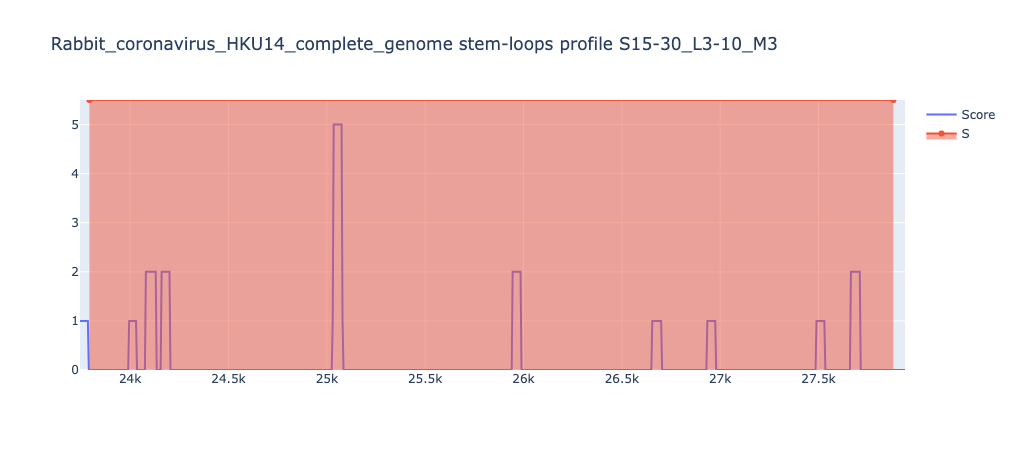

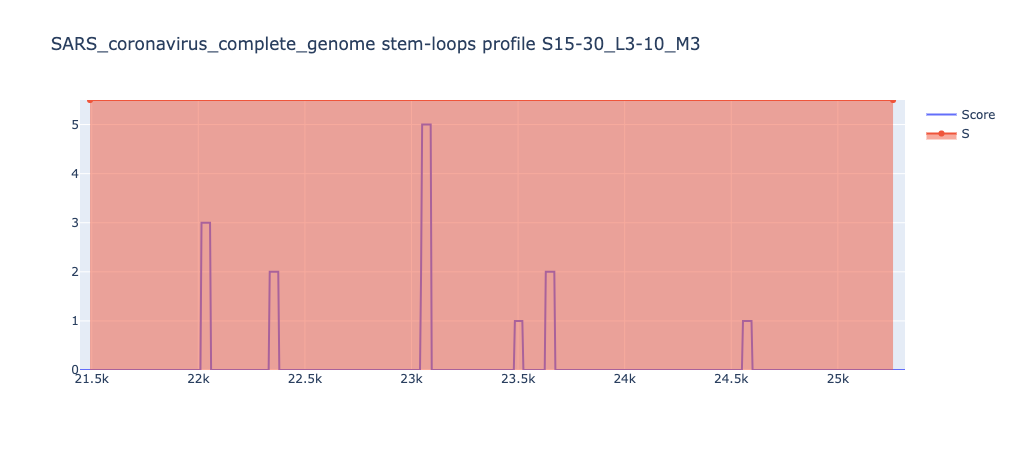

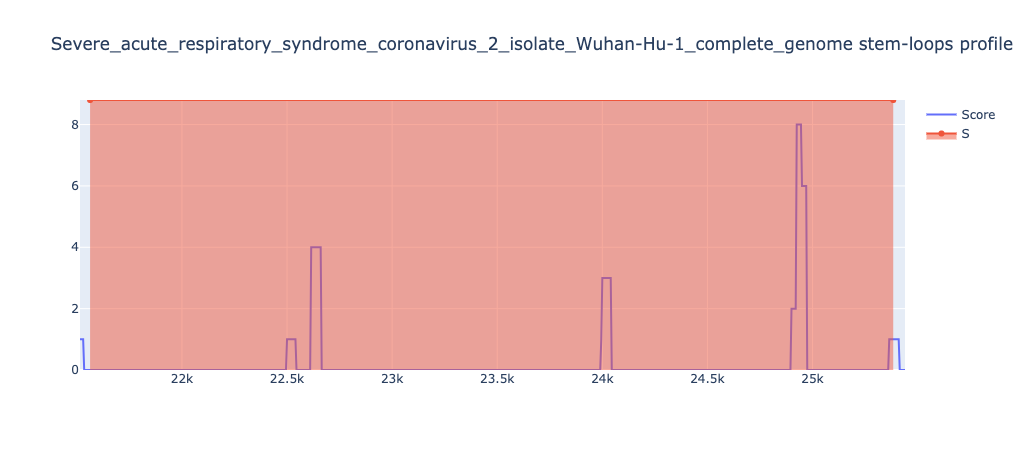

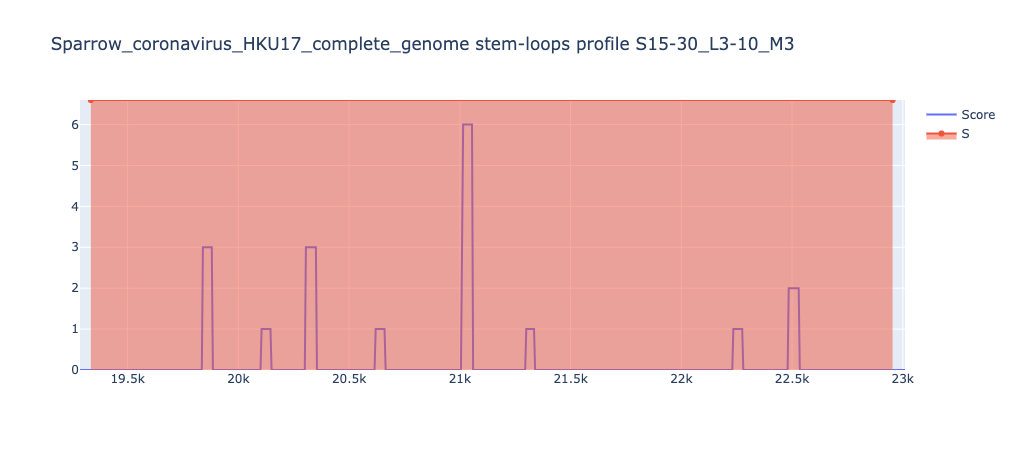

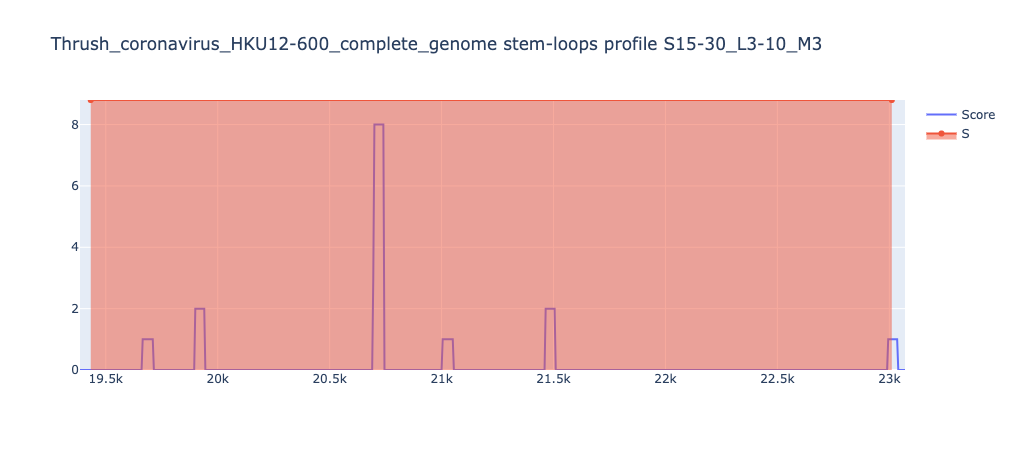

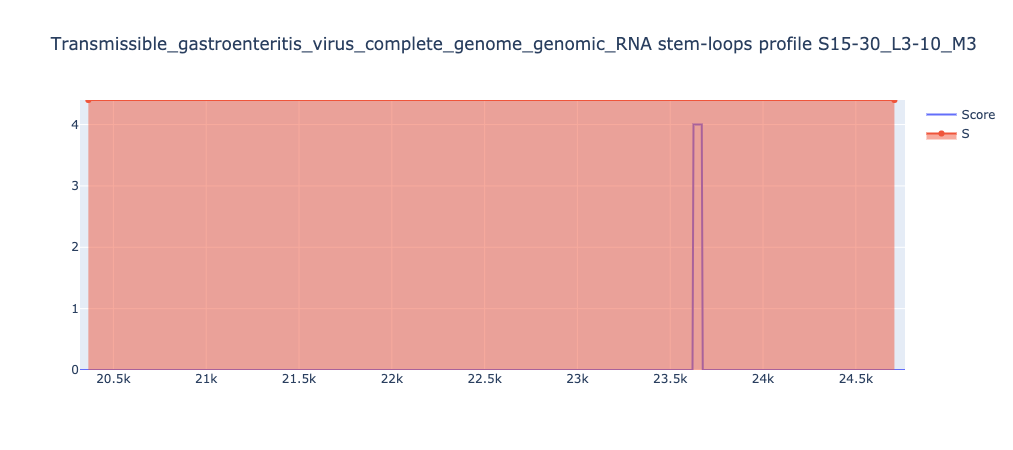

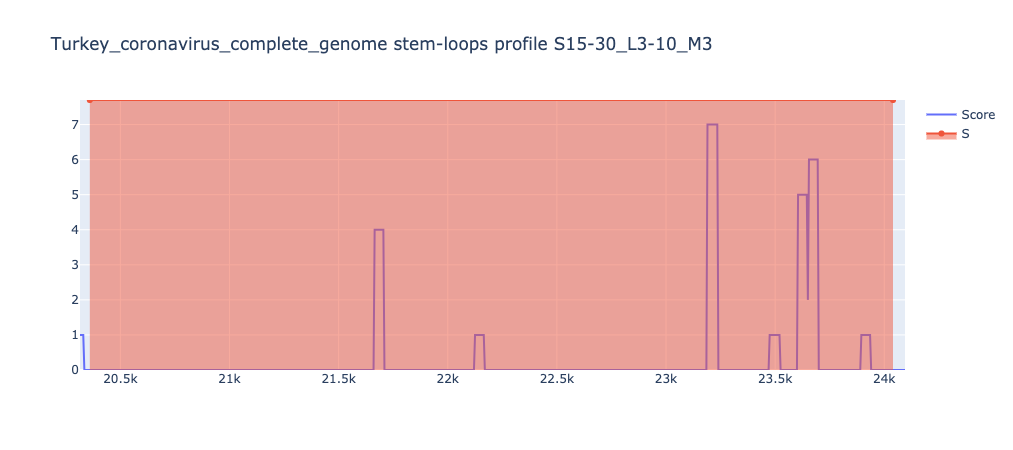

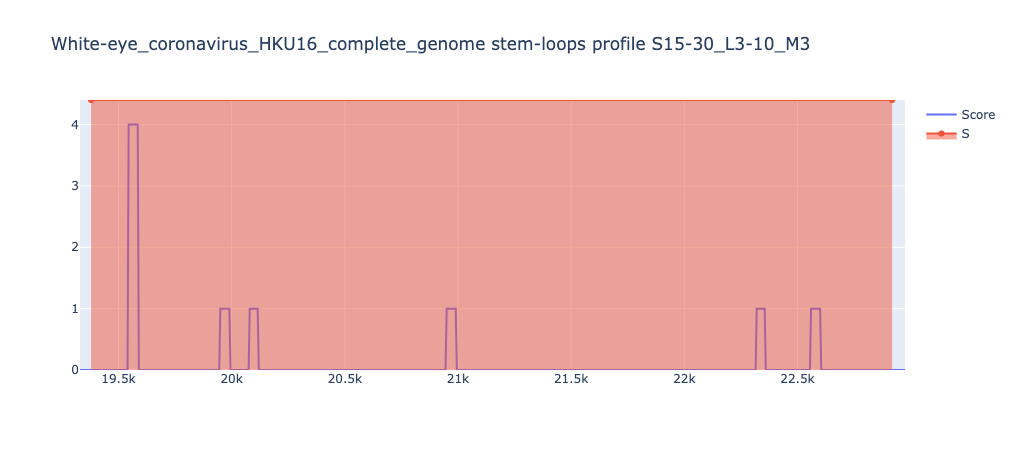

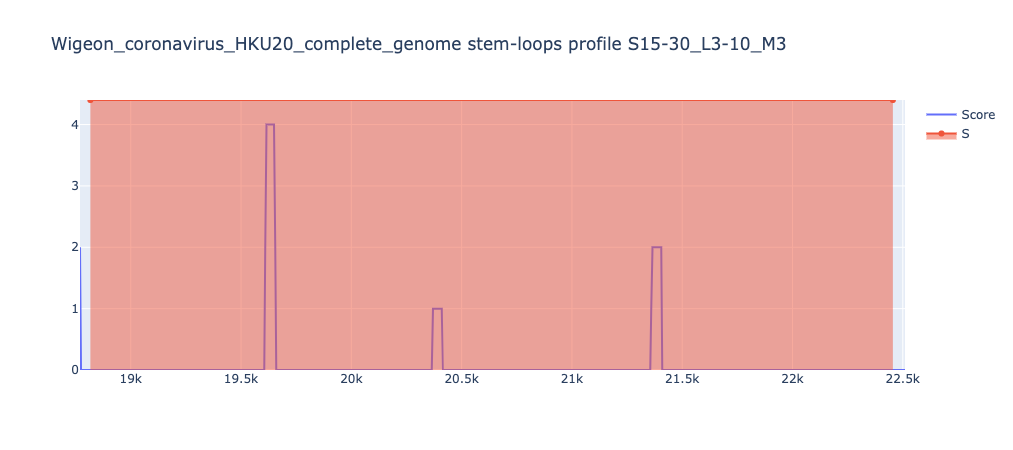

In [46]:
bins_scores_df = pd.read_csv(f'results/coronaviruses_scores_by_virus_10_S15-30_L3-10_M3.csv', index_col=0)
annotation_df = pd.read_csv('results/all_coronaviruses_genes_annotation.csv')
annotation_df = annotation_df[annotation_df.gene.notna()]
annotation_df = annotation_df[annotation_df.gene.str.lower() == 's'].set_index('name')
annotation_df.gene.fillna('', inplace=True)
for virus, virus_df in bins_scores_df.groupby('virus'):
    id_ = virus_df.id.unique()[0]
    if id_ not in annotation_df.index:
        continue
    gene_record = annotation_df.loc[id_]
    virus_df = virus_df[
    (virus_df.Start > gene_record.Start-50) &
    (virus_df.Start < gene_record.End+60)
    ]
    bins_scores_df_by_bins = virus_df.groupby('Start').agg({'Score': np.mean}).reset_index()
    bins_scores_df_by_bins = bins_scores_df_by_bins.fillna(0)
    MAX_Y_VALUE = bins_scores_df_by_bins['Score'].max() * 1.1
    MIN_Y_VALUE = 0
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=bins_scores_df_by_bins['Start'],
            y=bins_scores_df_by_bins['Score'],
            name='Score',
        )
    )
    y = 1
    fig.add_trace(
        go.Scatter(
            x=[gene_record.Start, gene_record.End],
            y=[MAX_Y_VALUE*y, MAX_Y_VALUE*y],
            name='S',
            fill='tozeroy',
            opacity=0.1
        )
    )
    fig.update_layout(
        title=f'{virus.split(".fasta")[0]} stem-loops profile S15-30_L3-10_M3',
    )
    fig.update_yaxes(range=[MIN_Y_VALUE, MAX_Y_VALUE])
    fig.show()